##  CAPSTONE PROJECT 1- CREDIT CARD APPROVAL MODEL

### Introduction:
A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.

### Objective of the study:

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, the definition of 'good' or 'bad' is not given.The project aims to conduct extensive data analysis and the implementation of various machine learning techniques in Python in order to create the best model with the most important features of a house in terms of both business value and realistic perspective. The dataset contains 19 columns and 1548 rows. 
* Not approving a credit card to an applicant having a good credit risk is a loss of business to the bank.
* Approving a credit card to an applicant having a bad credit risk is also a loss of business to the bank.

### Aim:
* Performing necessary feature engineering step to clean clean and   modify the data.
* Identifying important features that may play important role to credit card approval.
* Predicitng label using a machine learning model

# Dataset Description:
Our dataset name is Credit_Card.csv 

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set()

# 1. Load Data

In [432]:
# INDEPENDENT VARIABLES
credit_card=pd.read_csv("Credit_card.csv")

In [433]:
#Dependent variables
credit_card_label=pd.read_csv("Credit_card_label.csv")

In [434]:
credit_card.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [435]:
credit_card_label.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

#  2.Merging two independent and         dependent variable

In [436]:
final=pd.merge(credit_card,credit_card_label,on= 'Ind_ID' ,how='inner')
final.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [437]:
final.info()
# checking the number of col is categorical and numerical
#object-08,08 int,02 float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

# 3.Data Exploration (Exploratory Data Analysis or EDA)

In [438]:
# To check the null value in the dataset 
final.isnull().sum()
##gender, Annual_income,Birthday_count,type_occupation


Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [439]:
# converting it into percentage
round(final.isnull().sum()/len(final)*100,2)

Ind_ID              0.00
GENDER              0.45
Car_Owner           0.00
Propert_Owner       0.00
CHILDREN            0.00
Annual_income       1.49
Type_Income         0.00
EDUCATION           0.00
Marital_status      0.00
Housing_type        0.00
Birthday_count      1.42
Employed_days       0.00
Mobile_phone        0.00
Work_Phone          0.00
Phone               0.00
EMAIL_ID            0.00
Type_Occupation    31.52
Family_Members      0.00
label               0.00
dtype: float64

### Observation
About 31.52% of occupation information is missing, which is a significant less then avg amount, 
0.45% is missiong from gender can be ignore,
1.49% of data is missing in Annual_income, 
1.42 of data is missing in Birthday_count,

In [363]:
 #normalization value counts
final.label.value_counts(normalize=True)

0    0.886951
1    0.113049
Name: label, dtype: float64

We can plot the target column value counts by calling the plot() function and telling it what kind of plot we'd like, in this case, bar is good

<Axes: >

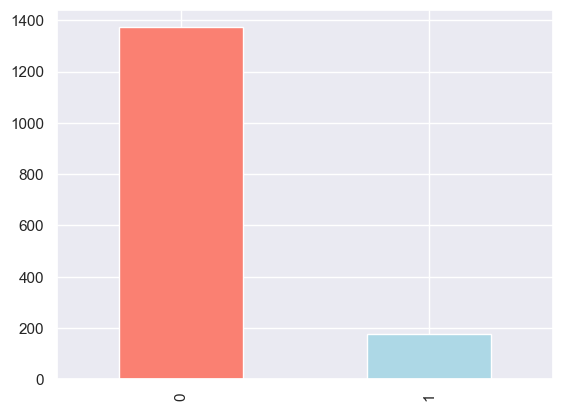

In [364]:
final.label.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [365]:
#  0 is application approved and 1 is application rejected. 
final.label.value_counts()

0    1373
1     175
Name: label, dtype: int64

Since these two values are not equal,our label column can be consider not balanced 
if it is not balanced then we have to use tree base algorithm--decision tree,random forest

In [366]:
final.duplicated().sum() # There is no duplicate in the dataset

0

In [367]:
final["GENDER"].unique()

array(['M', 'F', nan], dtype=object)

In [368]:
final["Annual_income"].unique()

array([ 180000. ,  315000. ,       nan,  450000. ,   90000. ,  472500. ,
        270000. ,  126000. ,  202500. ,  157500. ,  112500. ,  540000. ,
        292500. ,  135000. ,   76500. ,  215100. ,  225000. ,   67500. ,
        171000. ,  103500. ,   99000. ,  391500. ,   65250. ,   72900. ,
        360000. ,  256500. ,  675000. ,  247500. ,   85500. ,  121500. ,
        130500. ,  211500. ,   81000. ,   72000. ,  148500. ,  162000. ,
        195750. ,  585000. ,  216000. ,  306000. ,  108000. ,   63000. ,
         45000. ,  337500. ,  131400. ,  117000. ,  445500. ,  234000. ,
       1575000. ,  144000. ,   67050. ,   73350. ,  193500. ,  900000. ,
         94500. ,  198000. ,   54000. ,  166500. ,  167400. ,  153000. ,
        423000. ,  243000. ,  283500. ,  252000. ,  495000. ,  612000. ,
         36000. ,  139500. ,  133650. ,  427500. ,  261000. ,  231750. ,
         90900. ,   45900. ,  119250. ,   58500. ,  328500. ,  787500. ,
        594000. ,  119700. ,   69372. ,   37800. , 

In [369]:
final["Type_Occupation"].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [370]:
final["Car_Owner"].unique()

array(['Y', 'N'], dtype=object)

In [371]:
final["Propert_Owner"].unique()

array(['Y', 'N'], dtype=object)

In [372]:
final["CHILDREN"].unique()

array([ 0,  1,  2,  4,  3, 14], dtype=int64)

In [373]:
final["Marital_status"].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [374]:
final["label"].unique()

array([1, 0], dtype=int64)

In [375]:
# Find the correlation between our independent variables
corr_matrix = final.corr()
corr_matrix

C:\Users\HP\AppData\Local\Temp\ipykernel_17872\501542009.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = final.corr()


Ind_ID  CHILDREN  Annual_income  Birthday_count  \
Ind_ID          1.000000  0.032535       0.030147        0.022909   
CHILDREN        0.032535  1.000000       0.078497        0.279716   
Annual_income   0.030147  0.078497       1.000000        0.111638   
Birthday_count  0.022909  0.279716       0.111638        1.000000   
Employed_days  -0.055396 -0.219095      -0.160175       -0.619039   
Mobile_phone         NaN       NaN            NaN             NaN   
Work_Phone      0.085794  0.035014      -0.071171        0.174687   
Phone           0.008403 -0.004908      -0.006439       -0.029215   
EMAIL_ID       -0.037923  0.025776       0.122320        0.166749   
Family_Members  0.016950  0.890248       0.050957        0.266527   
label           0.016796 -0.021646       0.027456       -0.045097   

                Employed_days  Mobile_phone  Work_Phone     Phone  EMAIL_ID  \
Ind_ID              -0.055396           NaN    0.085794  0.008403 -0.037923   
CHILDREN            -0.219095           NaN    0.035014 -0.004908  0.025776   
Annual_income       -0.160175           NaN   -0.071171 -0.006439  0.122320   
Birthday_count      -0.619039           NaN    0.174687 -0.029215  0.166749   
Employed_days        1.000000           NaN   -0.231184 -0.003403 -0.118268   
Mobile_phone              NaN           NaN         NaN       NaN       NaN   
Work_Phone          -0.231184           NaN    1.000000  0.352439 -0.009594   
Phone               -0.003403           NaN    0.352439  1.000000  0.018105   
EMAIL_ID            -0.118268           NaN   -0.009594  0.018105  1.000000   
Family_Members      -0.238705           NaN    0.072228  0.005372  0.035098   
label                0.031408           NaN   -0.007046 -0.000664  0.012921   

                Family_Members     label  
Ind_ID                0.016950  0.016796  
CHILDREN              0.890248 -0.021646  
Annual_income         0.050957  0.027456  
Birthday_count        0.266527 -0.045097  
Employed_days        -0.238705  0.031408  
Mobile_phone               NaN       NaN  
Work_Phone            0.072228 -0.007046  
Phone                 0.005372 -0.000664  
EMAIL_ID              0.035098  0.012921  
Family_Members        1.000000 -0.030709  
label                -0.030709  1.000000

C:\Users\HP\AppData\Local\Temp\ipykernel_17872\1498935902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final.corr(),annot=True,linewidth=0.2)


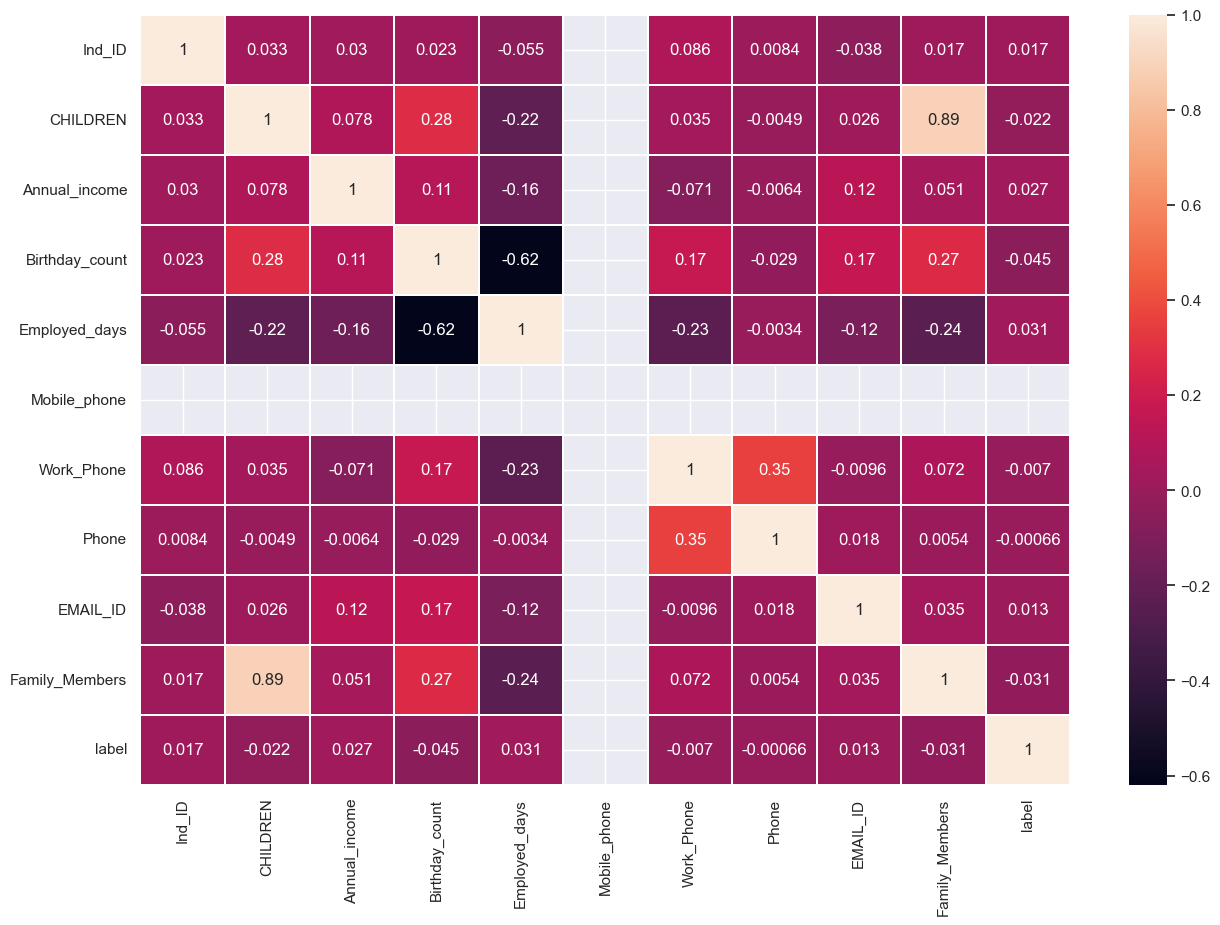

In [376]:
plt.figure(figsize=(15, 10))
sns.heatmap(final.corr(),annot=True,linewidth=0.2)
plt.show()
# children and family is having storng correlation

In [377]:
# from describe we can see the count,max,min  and rough idea about outlier
final.describe()
## ouliers are present in Birthday_count,employed_days

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members        label  
count     1548.000000  1548.000000  
mean         2.161499     0.113049  
std          0.947772     0.316755  
min          1.000000     0.000000  
25%          2.000000     0.000000  
50%          2.000000     0.000000  
75%          3.000000     0.000000  
max         15.000000     1.000000

# 4.dealing with missing value

<Axes: >

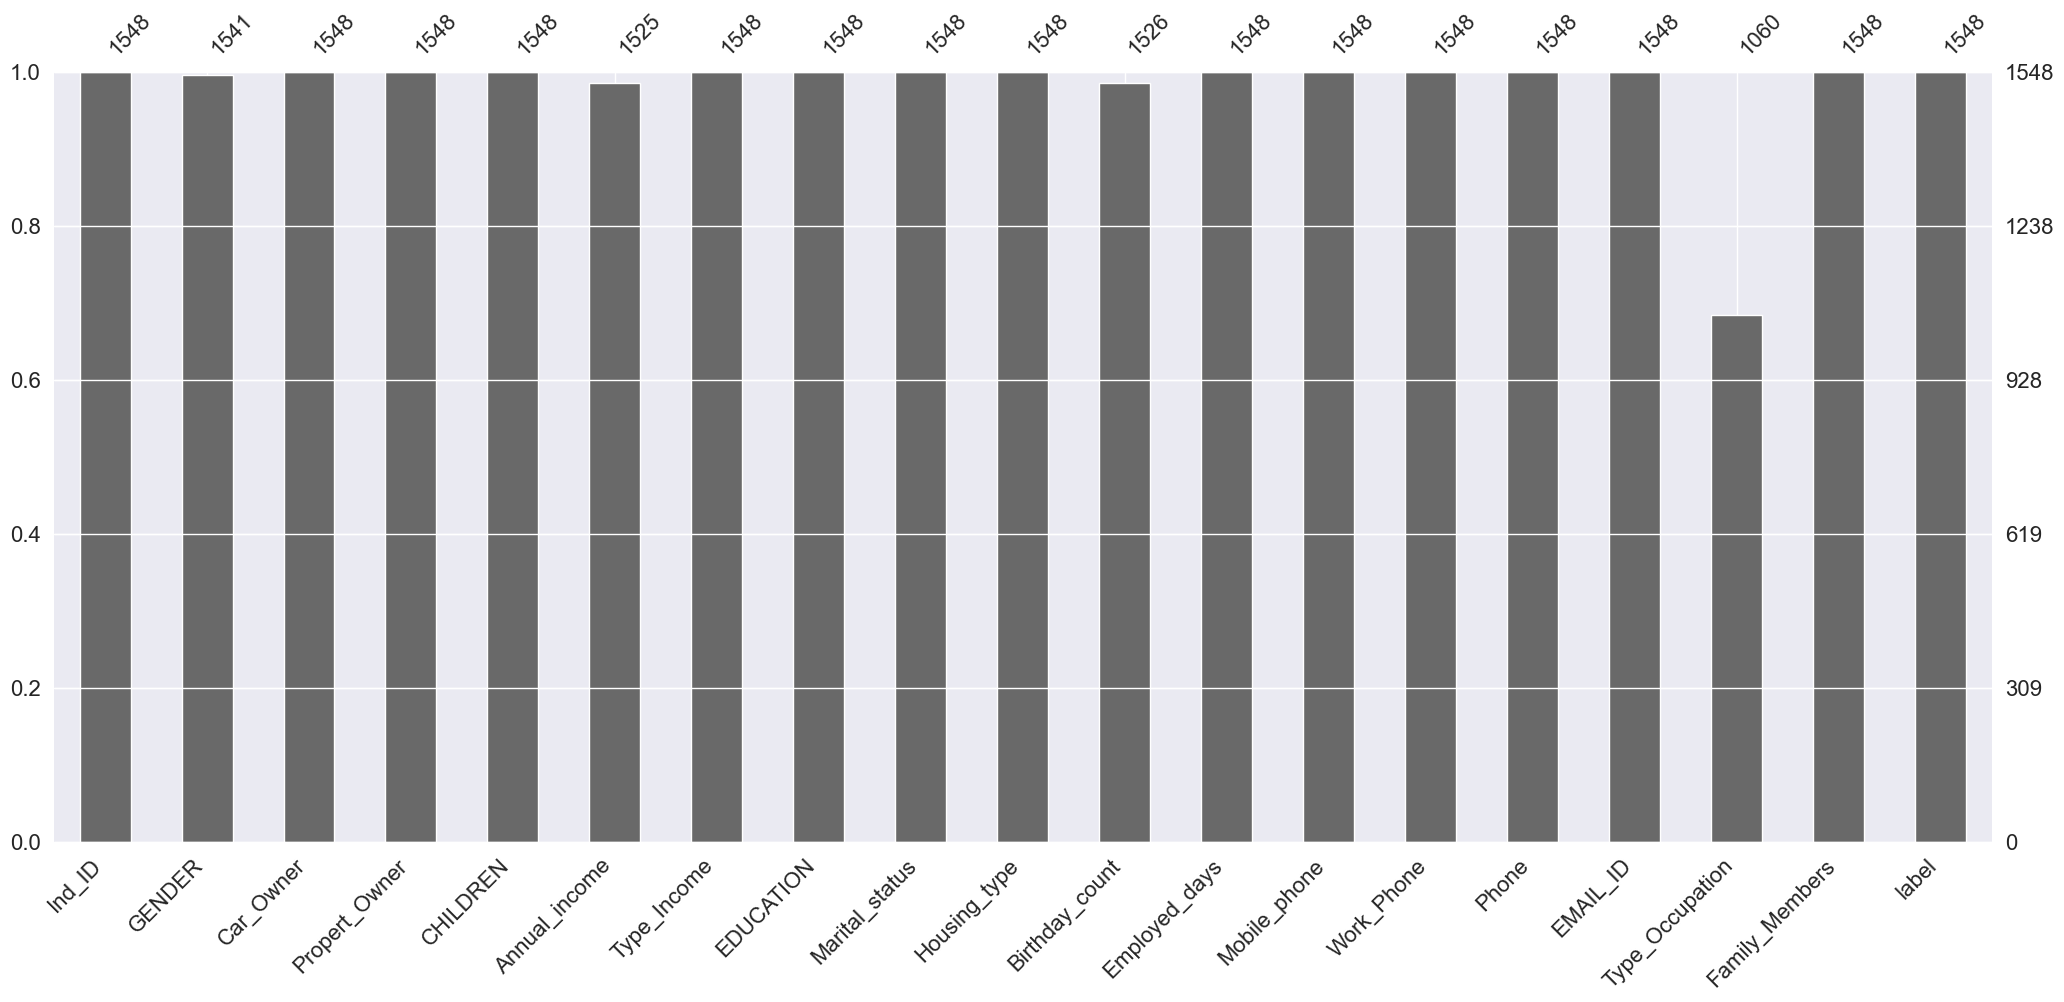

In [378]:
msno.bar(final)

In [379]:
# checking if one observation has missing values more than 1
Missing_I = final.isnull().sum(axis = 1)
Missing_I = Missing_I[Missing_I > 1]
Missing_I

2       2
3       2
5       2
27      2
65      2
125     2
143     2
205     2
273     2
561     2
689     2
915     2
919     2
991     2
1199    2
1263    2
1285    2
dtype: int64

<Axes: >

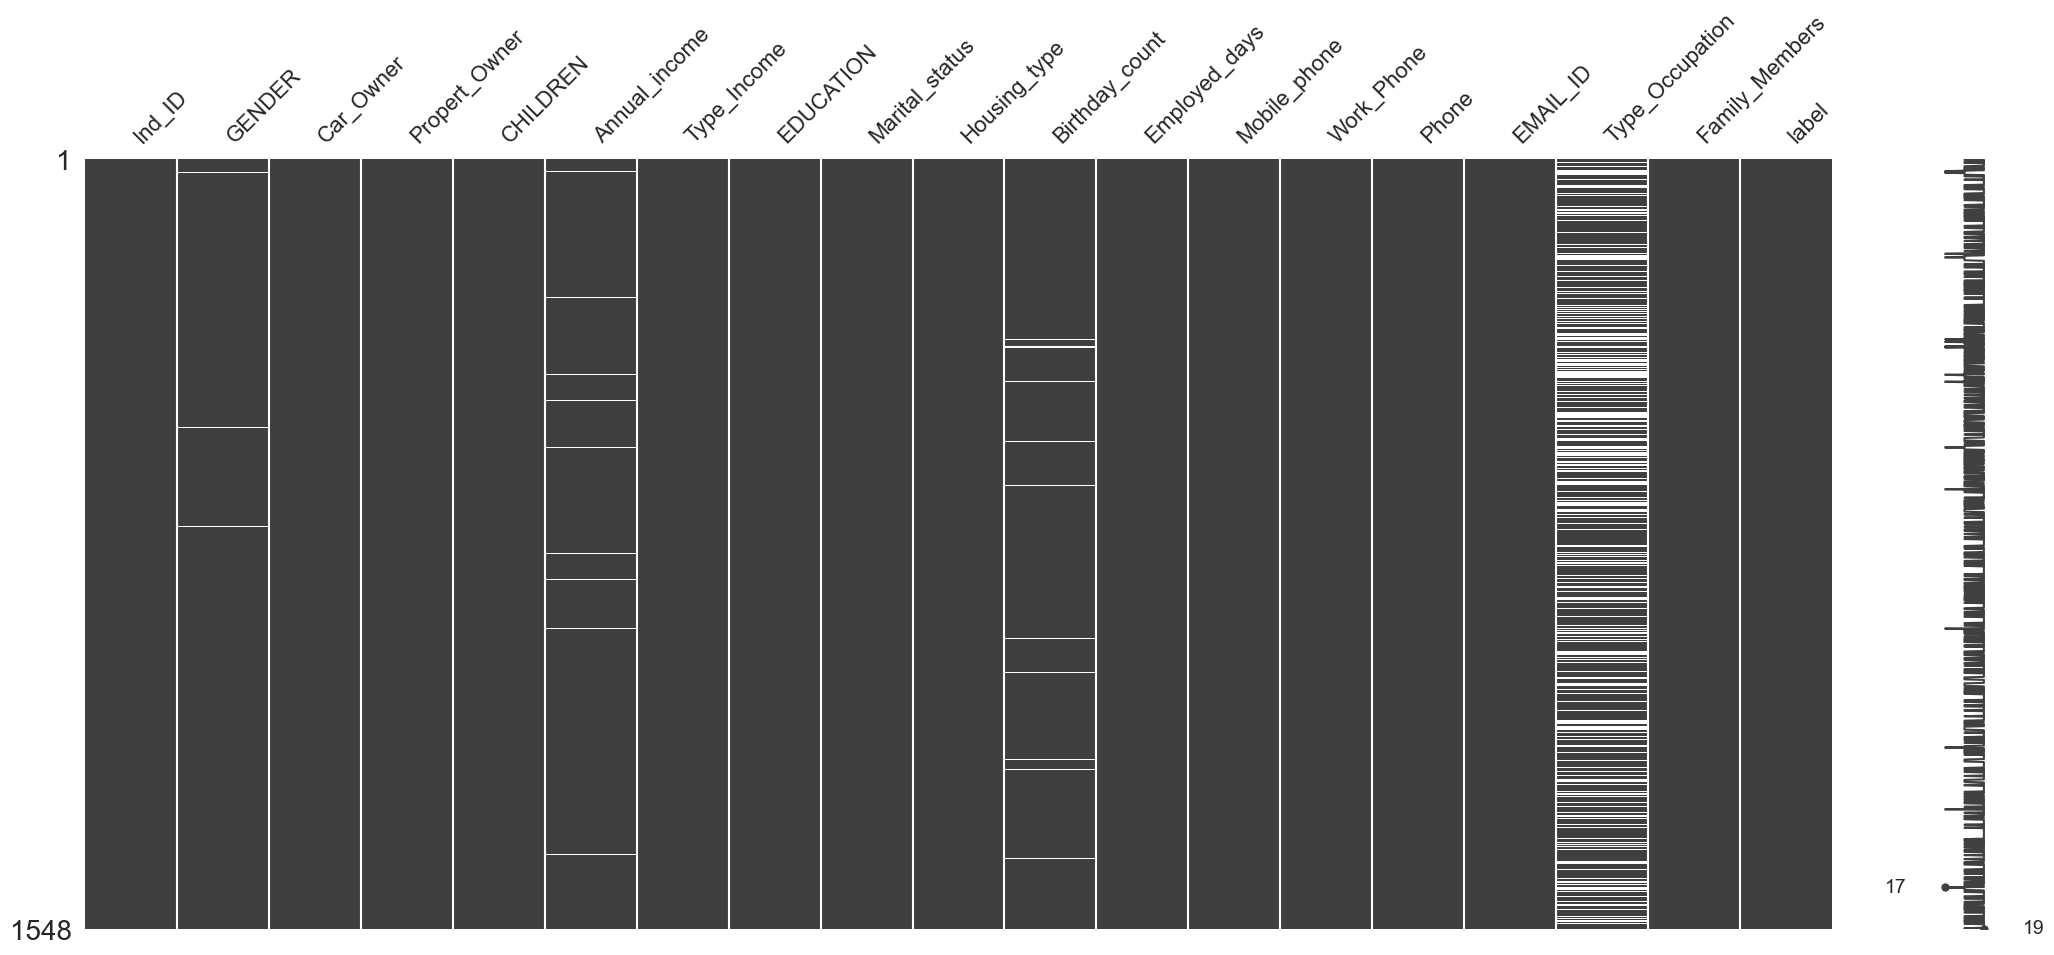

In [380]:
sorted_final=final.sort_values(by="Ind_ID")
sorted_final
msno.matrix(sorted_final)

* Apart from Type_occupation column, rest other columns have very     moderate missing values.
* Either we can remove them or replace with something like MODE.

<Axes: >

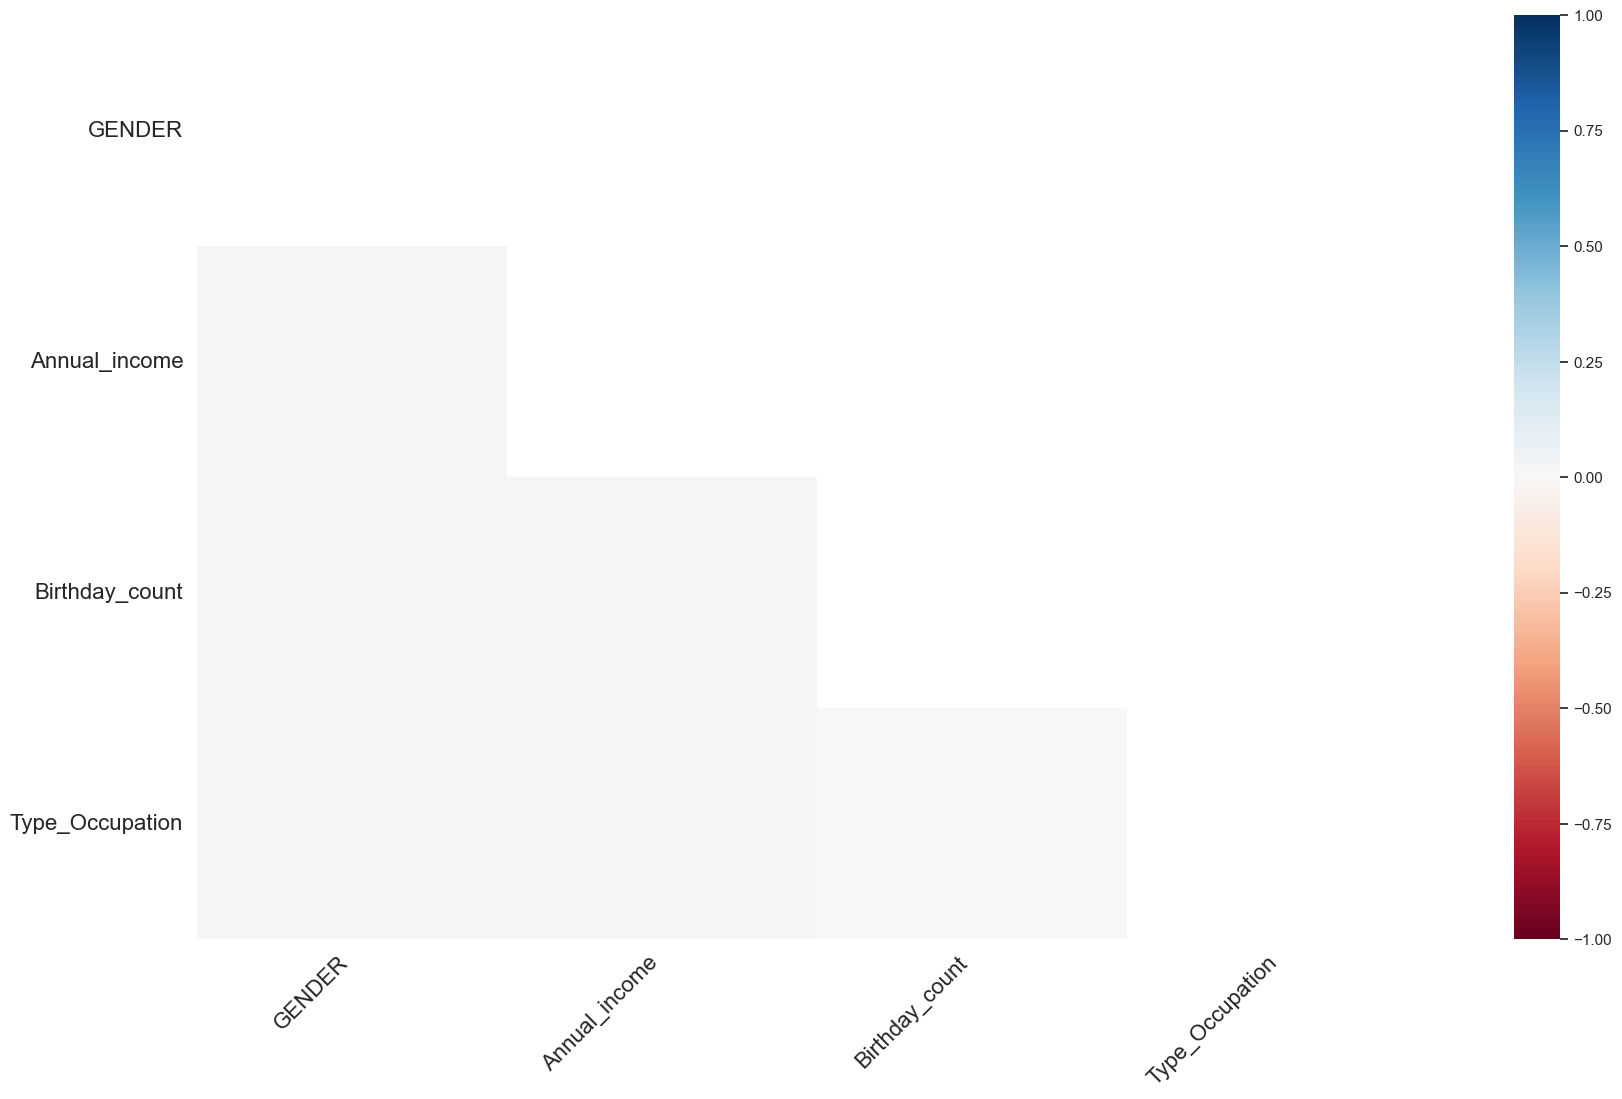

In [381]:
msno.heatmap(final)

 * no missing value have strong relationship with each other

I'm not droping the missing rows of type of col type_occupation information data because in credit card approval occupation information is a import col so it should be fill compulsory by using mode imputation i'm going to fill the empty row. 

annual income col related rows also i'm not droping  beacuse source of income play a import role in credit card approval so by using KNN imputation technique i'm going to fill the empty row. 

## 5. Imputation Gender, Annual_income, Birthday_count, Type_Occupation

In [382]:
# KNN Imputaion technique or mice techinque . Here i select KNN Technique
from sklearn.impute import KNNImputer
knn_imputer=KNNImputer()

In [383]:
## Annual_Income
final["Annual_income"]=knn_imputer.fit_transform(final[["Annual_income"]])
final["Birthday_count"]=knn_imputer.fit_transform(final[["Birthday_count"]])
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [384]:
## check and convert it into object
final["Type_Occupation"]=final["Type_Occupation"].astype("object")
final["GENDER"]=final["GENDER"].astype("object")

In [385]:
## GENDER is categorical data so we can fill with mode
final["GENDER"]=final["GENDER"].fillna(final["GENDER"].mode()[0]) 
final["Type_Occupation"]=final["Type_Occupation"].fillna(final["Type_Occupation"].mode()[0])
final.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

### The missing value is filled.
 the categorical data is filled with the mode imputation and the other numerical data is filled using KKN Imputation

# 6.Visualization anaysis 

  *  Between iindependent and dependent variables

### Bivariate Analysis -

Bivariate analysis involves checking the relationship between two variables.

### 6.1. GENDER vs label

(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

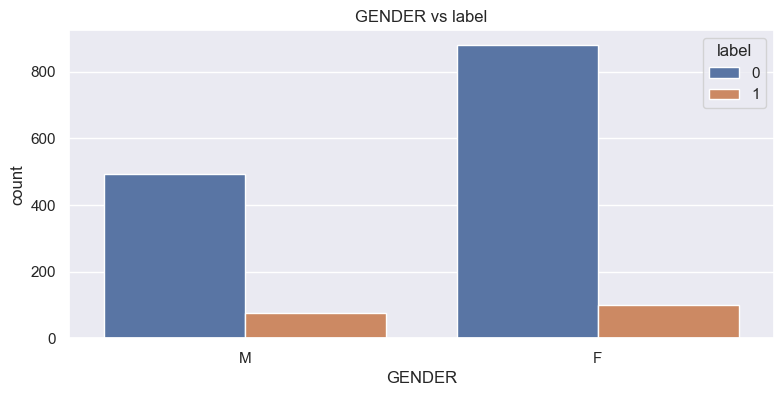

In [386]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=final["GENDER"],hue=final['label'], data = final)
plt.title("GENDER vs label")
plt.xticks(rotation=0)

### Obervation
1. maximum female got credit approval as compare to male  

### 6.2.Type_Occupation vs label

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Cooking staff'),
  Text(3, 0, 'Sales staff'),
  Text(4, 0, 'Accountants'),
  Text(5, 0, 'High skill tech staff'),
  Text(6, 0, 'Managers'),
  Text(7, 0, 'Cleaning staff'),
  Text(8, 0, 'Drivers'),
  Text(9, 0, 'Low-skill Laborers'),
  Text(10, 0, 'IT staff'),
  Text(11, 0, 'Waiters/barmen staff'),
  Text(12, 0, 'Security staff'),
  Text(13, 0, 'Medicine staff'),
  Text(14, 0, 'Private service staff'),
  Text(15, 0, 'HR staff'),
  Text(16, 0, 'Secretaries'),
  Text(17, 0, 'Realty agents')])

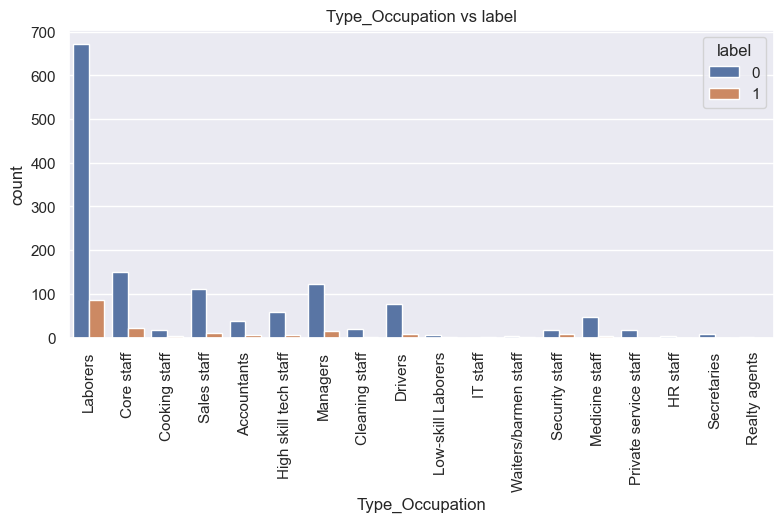

In [387]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=final["Type_Occupation"],hue=final['label'], data = final)
plt.title("Type_Occupation vs label")
plt.xticks(rotation=90)

### Observation
1. maximum laborers workers got the credit card approval then core staff,managers and medicine staff
2. Realty agents workers got the minimum credit card approval  
3. most of the laborers workers only got disapproval the credit card

### 6.3.Type_Income vs label

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Pensioner'),
  Text(1, 0, 'Commercial associate'),
  Text(2, 0, 'Working'),
  Text(3, 0, 'State servant')])

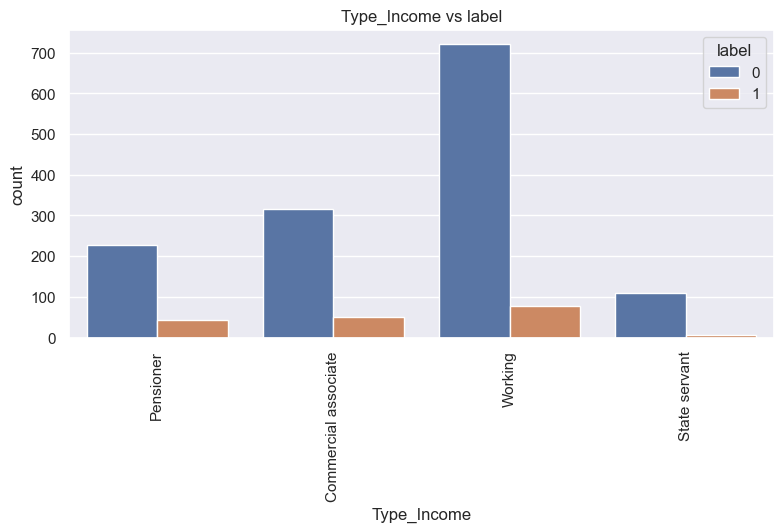

In [388]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=final["Type_Income"],hue=final['label'], data = final)
plt.title("Type_Income vs label")
plt.xticks(rotation=90)

### Observation
1. Most of the working people are selected for credit card approval and least number of State servant got approve for credit card

### 6.4.EDUCATION vs label

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Higher education'),
  Text(1, 0, 'Secondary / secondary special'),
  Text(2, 0, 'Lower secondary'),
  Text(3, 0, 'Incomplete higher'),
  Text(4, 0, 'Academic degree')])

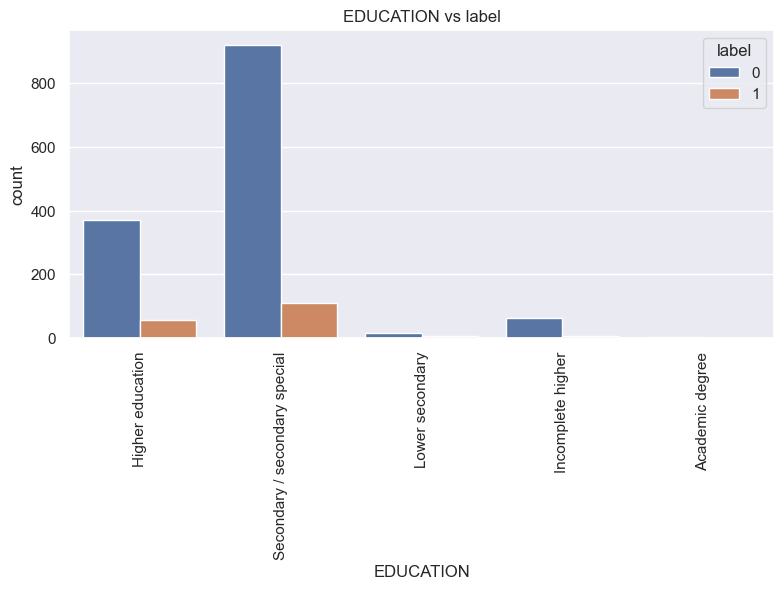

In [389]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=final["EDUCATION"],hue=final['label'], data = final)
plt.title("EDUCATION vs label")
plt.xticks(rotation=90)

### Observation
1. Maximum Secondary/secondary special got approve for credit and Minimum Academic dregree got approve for credit card
2. Maximum disapproval got for Incomplete higher and lower secondary

### 6.5.Marital_status vs label

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Single / not married'),
  Text(2, 0, 'Civil marriage'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Widow')])

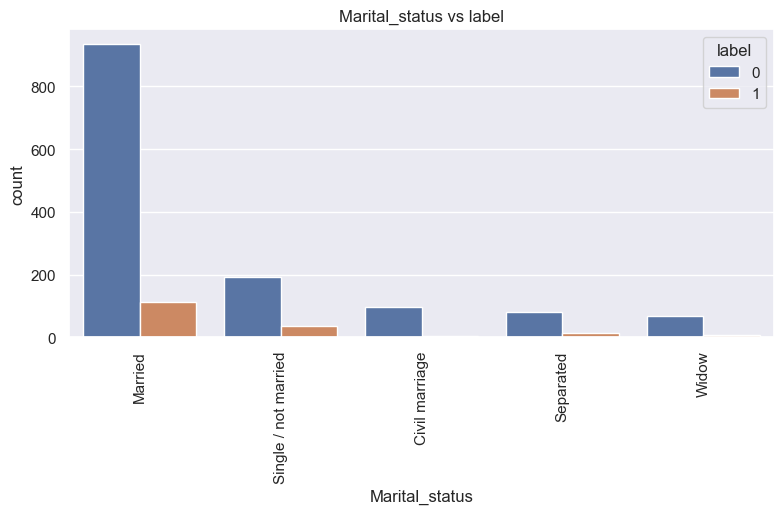

In [390]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=final["Marital_status"],hue=final['label'], data = final)
plt.title("Marital_status vs label")
plt.xticks(rotation=90)

## Observation:
1. maximum= Married,mim=widow
2. disapproval  max=married min=civil marriage

### 6.6.Housing_type vs label

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'House / apartment'),
  Text(1, 0, 'With parents'),
  Text(2, 0, 'Rented apartment'),
  Text(3, 0, 'Municipal apartment'),
  Text(4, 0, 'Co-op apartment'),
  Text(5, 0, 'Office apartment')])

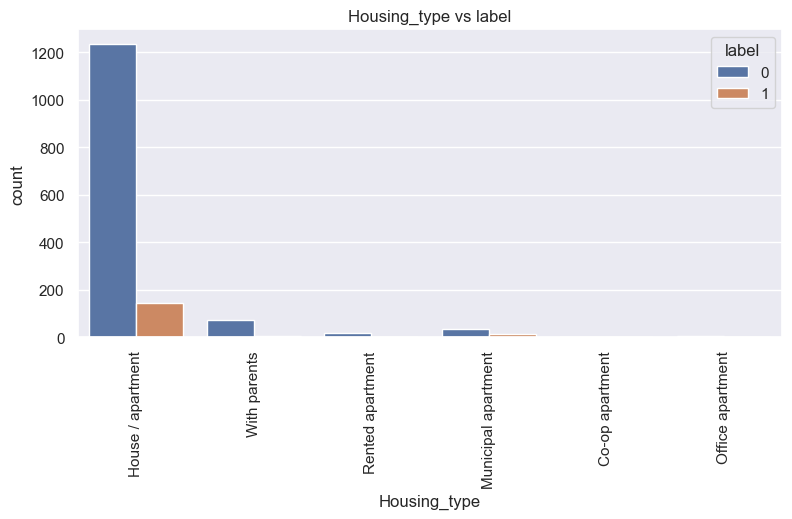

In [391]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=final["Housing_type"],hue=final['label'], data = final)
plt.title("Housing_type vs label")
plt.xticks(rotation=90)

### Observation:
1. max=House/apartment min=co-op apartment

### 6.7.Propert_Owner vs label

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

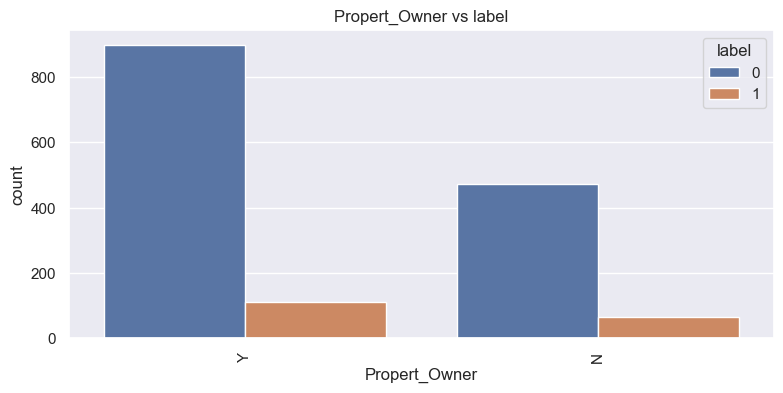

In [392]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=final["Propert_Owner"],hue=final['label'], data = final)
plt.title("Propert_Owner vs label")
plt.xticks(rotation=90)

### Observation:
1. maximum number of property owner got credit card approval

# 7.Outlier Detection

In [393]:
final.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0   180000.00000   
1  5009744      F         Y             N         0   315000.00000   
2  5009746      F         Y             N         0   315000.00000   
3  5009749      F         Y             N         0   191399.32623   
4  5009752      F         Y             N         0   315000.00000   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0   -18772.000000         365243             1           0      0         0   
1   -13557.000000           -586             1           1      1         0   
2   -16040.342071           -586             1           1      1         0   
3   -13557.000000           -586             1           1      1         0   
4   -13557.000000           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0        Laborers               2      1  
1        Laborers               2      1  
2        Laborers               2      1  
3        Laborers               2      1  
4        Laborers               2      1

In [394]:
final.describe() ## Birthday_count,employed_days

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.548000e+03     1548.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.124080e+05     4199.321477   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19476.000000   
50%    5.078842e+06     0.000000   1.710000e+05   -15814.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12483.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members        label  
count     1548.000000  1548.000000  
mean         2.161499     0.113049  
std          0.947772     0.316755  
min          1.000000     0.000000  
25%          2.000000     0.000000  
50%          2.000000     0.000000  
75%          3.000000     0.000000  
max         15.000000     1.000000

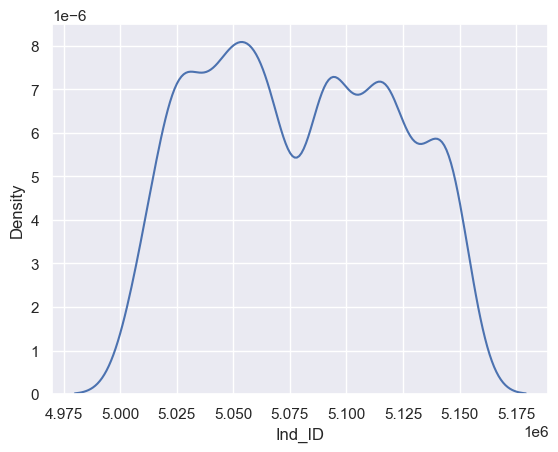

In [395]:
sns.kdeplot(final["Ind_ID"])
plt.show() ## the Ind_ID id not normalized

<Axes: >

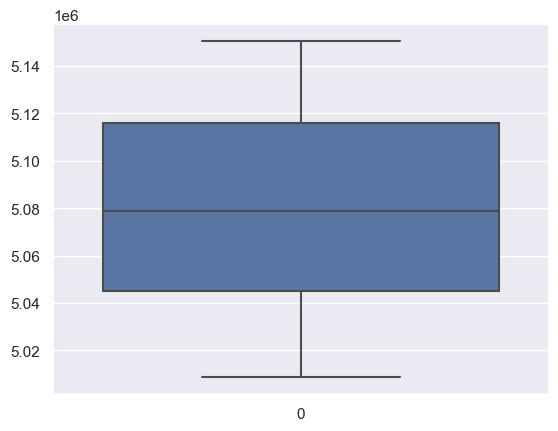

In [396]:
sns.boxplot(final["Ind_ID"]) ### there is no outlier in Ind_Id column

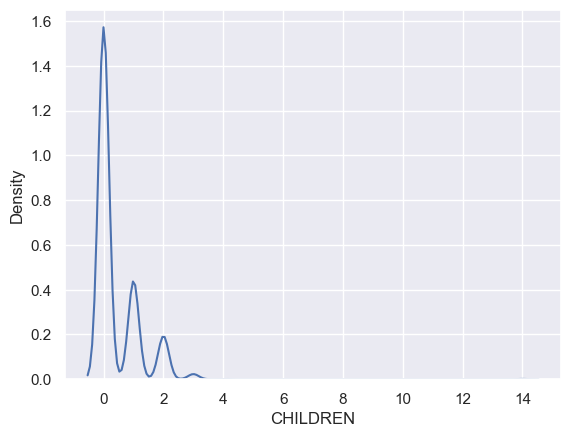

In [397]:
sns.kdeplot(final["CHILDREN"])
plt.show() ## right skewed data

<Axes: >

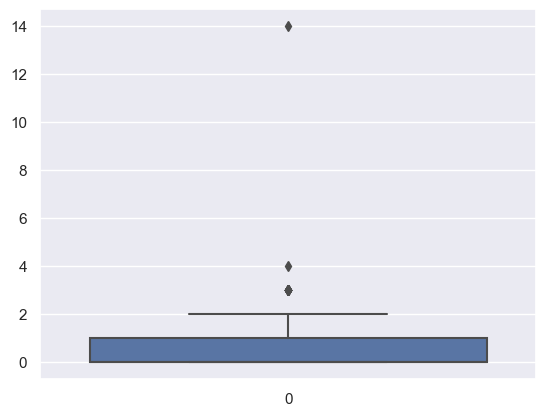

In [398]:
sns.boxplot(final["CHILDREN"])
#sns.boxplot(x="CHILDREN",y="label",data=final) # there are few outliers are there in Children col which is quit greater value

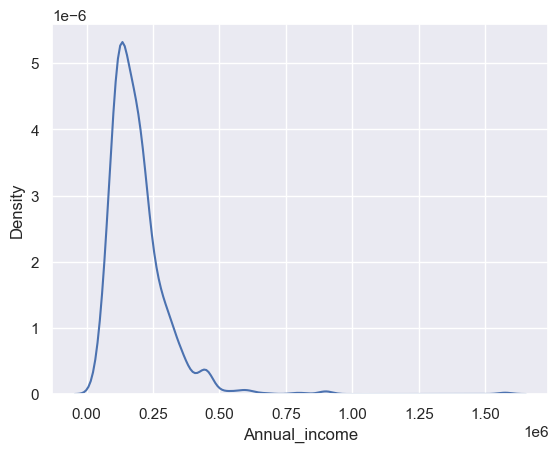

In [399]:
sns.kdeplot(final["Annual_income"])
plt.show()# right skwed data

<Axes: >

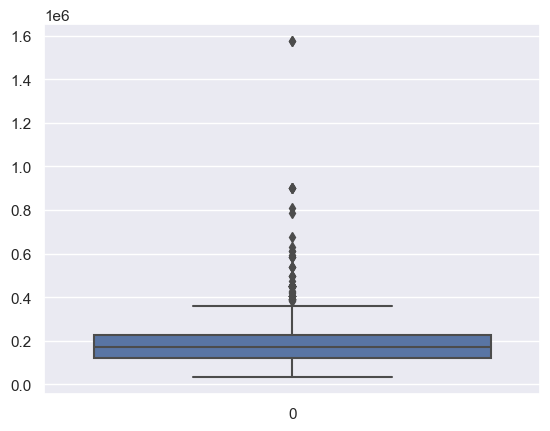

In [400]:
sns.boxplot(final["Annual_income"]) 
# there are many numbers of oulier in Annual_income col which are greater then the max limit

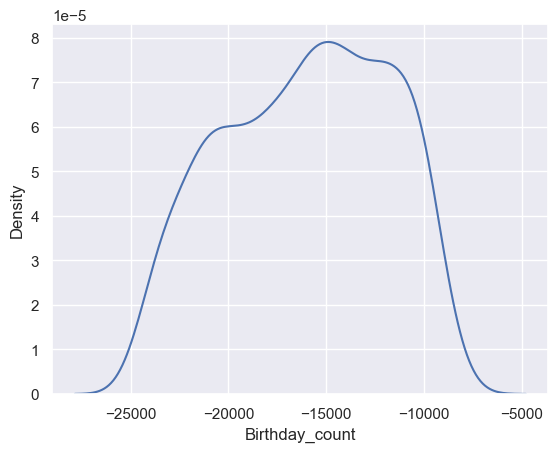

In [401]:
sns.kdeplot(final["Birthday_count"])
plt.show()# left skewed data

<Axes: >

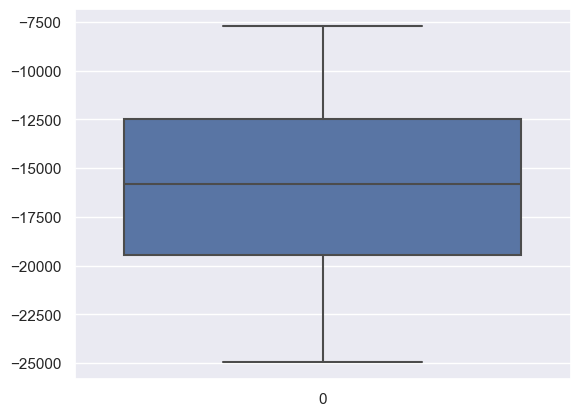

In [402]:
sns.boxplot(final["Birthday_count"]) #no outliers 

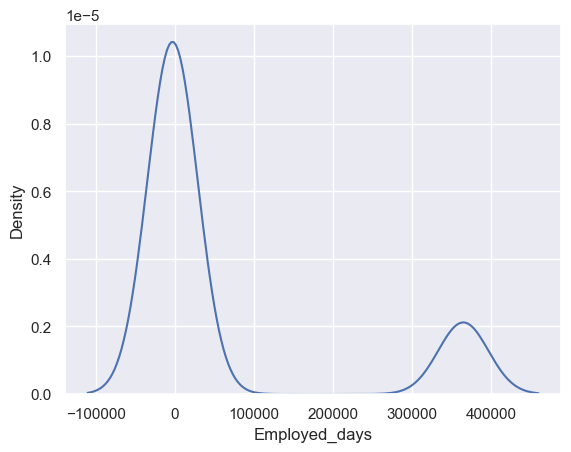

In [403]:
sns.kdeplot(final["Employed_days"])
plt.show() # no skew continuous data

<Axes: >

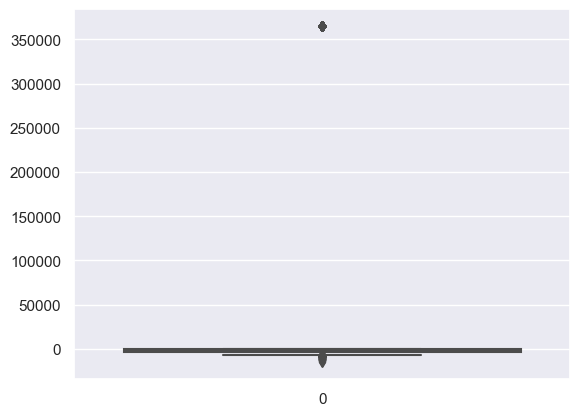

In [404]:
sns.boxplot(final["Employed_days"]) # there is only one oulier which is greater then the max limit

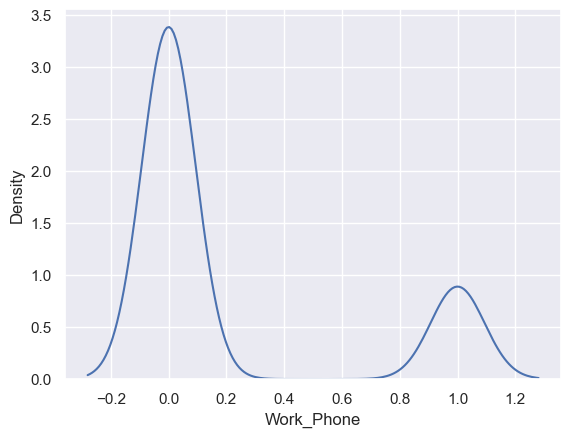

In [405]:
sns.kdeplot(final["Work_Phone"])
plt.show() # no skewd data

<Axes: >

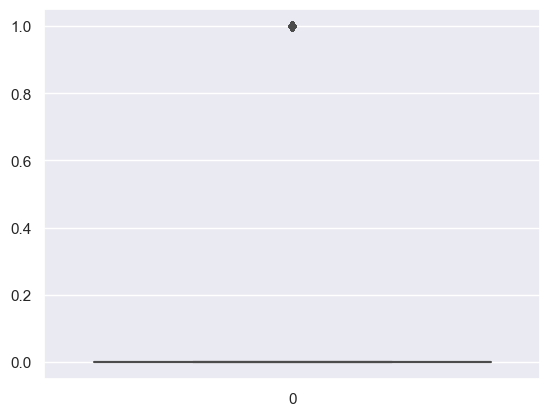

In [406]:
sns.boxplot(final["Work_Phone"]) # outliers are present

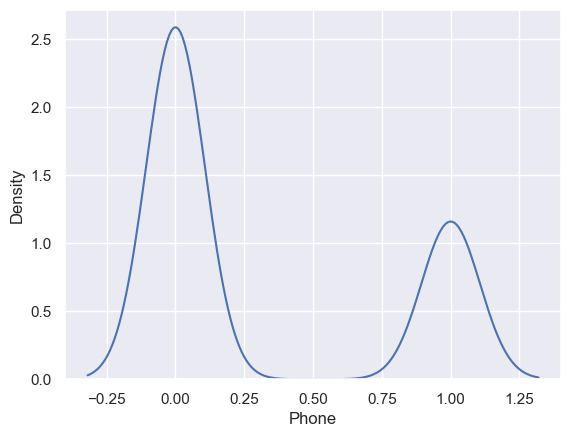

In [407]:
sns.kdeplot(final["Phone"])
plt.show() # continuous and left skewness data

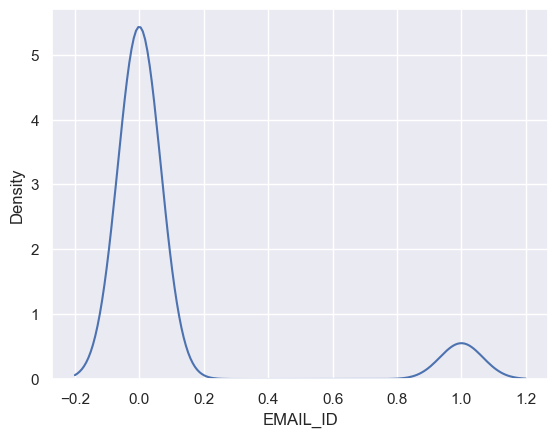

In [408]:
sns.kdeplot(final["EMAIL_ID"])
plt.show() # Right skewness data

<Axes: >

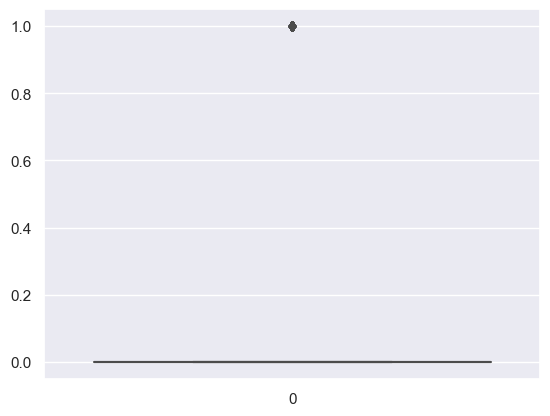

In [409]:
sns.boxplot(final["EMAIL_ID"]) # outlier is present

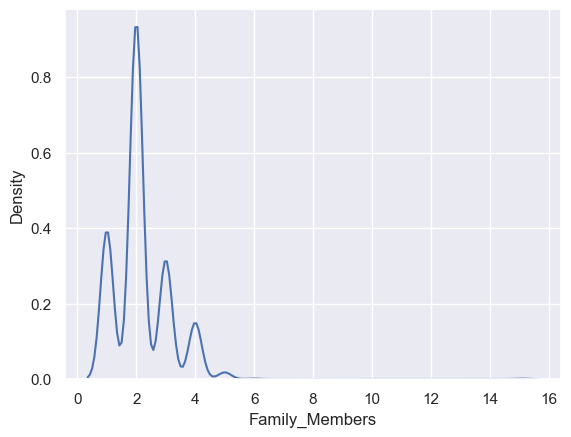

In [410]:
sns.kdeplot(final["Family_Members"])
plt.show() ## right skewed data

<Axes: >

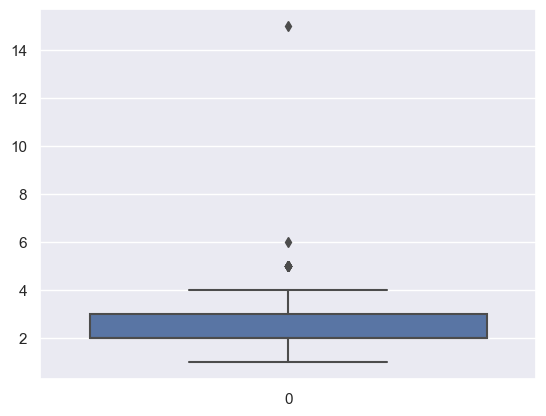

In [411]:
sns.boxplot(final["Family_Members"]) 
# oulier are there which is greater then the maximum limit

# 8. Outlier treatment

## 8.1. Z score  Method
lower_limit=Mean-3*std

high_limit=Mean+3*sta

In [412]:
#lower_lim=final["Annual_income"].mean()-(3*final["Annual_income"].std())  
#high_lim=final["Annual_income"].mean()+(3*final["Annual_income"].std())

In [413]:
#lower_lim

In [414]:
#high_lim

In [415]:
#final=final[(final["Annual_income"]>lower_lim) & (final["Annual_income"]<high_lim)]
#final.describe()

In [416]:
#sns.boxplot(final["Annual_income"]) # still some of the outliers are present in the dataset

## 8.2. IQR Method

In [417]:
Q1=final["Annual_income"].quantile(0.25)
Q3=final["Annual_income"].quantile(0.75)

In [418]:
Q1

121500.0

In [419]:
Q3

225000.0

In [420]:
IQR=Q3-Q1
IQR 

103500.0

In [421]:
low_lim = Q1 - 1.5*IQR
high_lim = Q3 + 1.5*IQR

In [422]:
low_lim

-33750.0

In [423]:
high_lim

380250.0

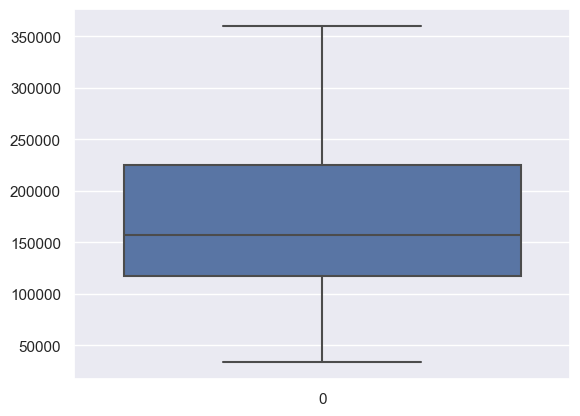

In [425]:
final=final[(final["Annual_income"]>low_lim) & (final["Annual_income"]<high_lim)]
sns.boxplot(final["Annual_income"]) 
# as we can see the oulier is removed
# IQR is the best method for outlier removal
final.to_csv("credit_card_final.csv",index=False)

### Over all Observation:
* still some of the outliers are present in the dataset by performing Z Score Method
* the value of IQR is more so the data is inconsistent
* this IQR is not trustable

In [426]:
credit_card_final=pd.read_csv("credit_card_final.csv")

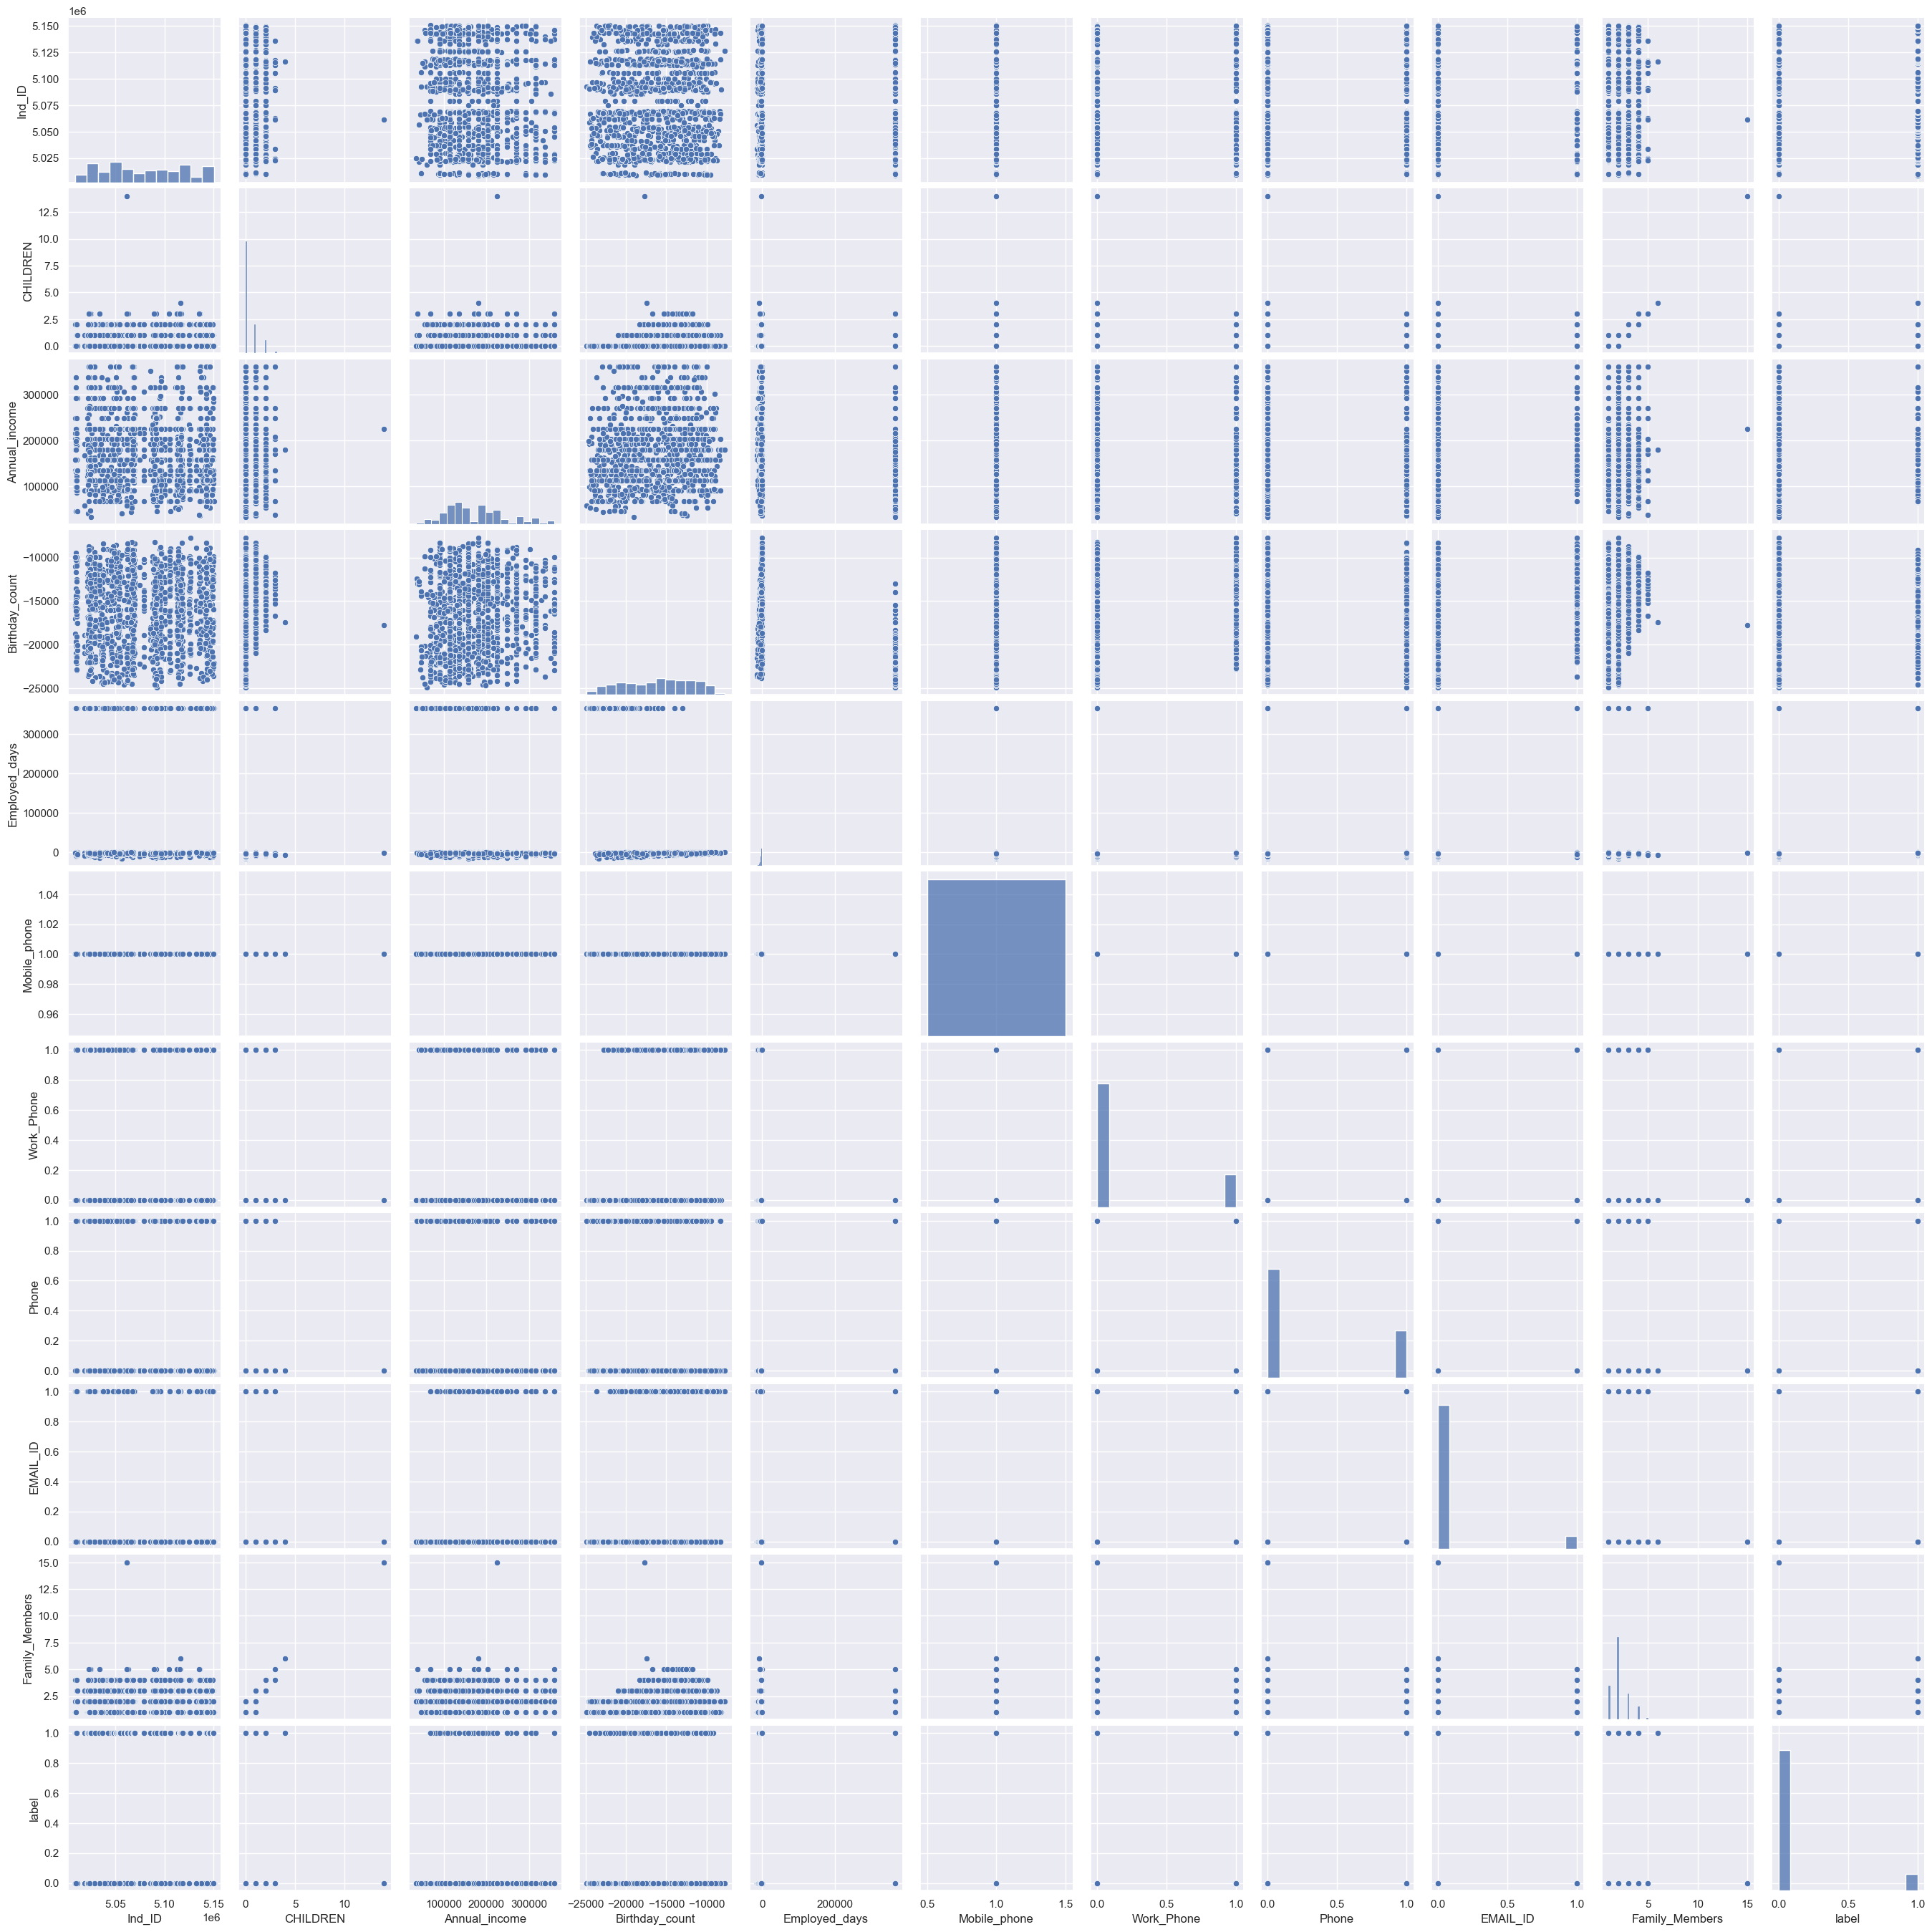

In [427]:
sns.pairplot(credit_card_final)
plt.show()

In [428]:
credit_card_final.head(5)

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0   180000.00000   
1  5009744      F         Y             N         0   315000.00000   
2  5009746      F         Y             N         0   315000.00000   
3  5009749      F         Y             N         0   191399.32623   
4  5009752      F         Y             N         0   315000.00000   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0   -18772.000000         365243             1           0      0         0   
1   -13557.000000           -586             1           1      1         0   
2   -16040.342071           -586             1           1      1         0   
3   -13557.000000           -586             1           1      1         0   
4   -13557.000000           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0        Laborers               2      1  
1        Laborers               2      1  
2        Laborers               2      1  
3        Laborers               2      1  
4        Laborers               2      1

In [429]:
credit_card_final.shape

(1475, 19)

In [430]:
final.shape

(1475, 19)

# 9.Feature Engineering

In [296]:
from scipy import stats

In [297]:
credit_card_final.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0   180000.00000   
1  5009744      F         Y             N         0   315000.00000   
2  5009746      F         Y             N         0   315000.00000   
3  5009749      F         Y             N         0   191399.32623   
4  5009752      F         Y             N         0   315000.00000   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0   -18772.000000         365243             1           0      0         0   
1   -13557.000000           -586             1           1      1         0   
2   -16040.342071           -586             1           1      1         0   
3   -13557.000000           -586             1           1      1         0   
4   -13557.000000           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0        Laborers               2      1  
1        Laborers               2      1  
2        Laborers               2      1  
3        Laborers               2      1  
4        Laborers               2      1

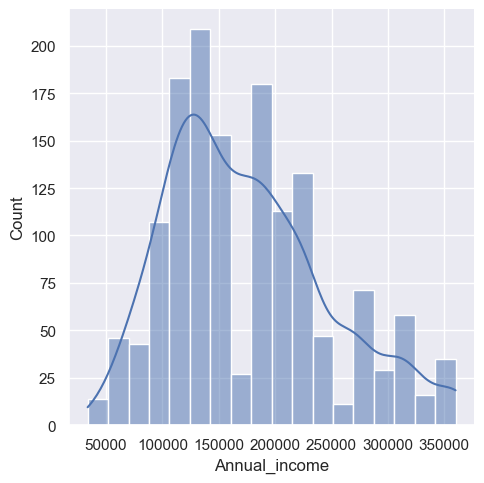

In [298]:
sns.displot(credit_card_final["Annual_income"],kde=True)

## 9.1 square root transformation

In [299]:
credit_card_final["Annual_income"]=np.sqrt(credit_card_final["Annual_income"]) 

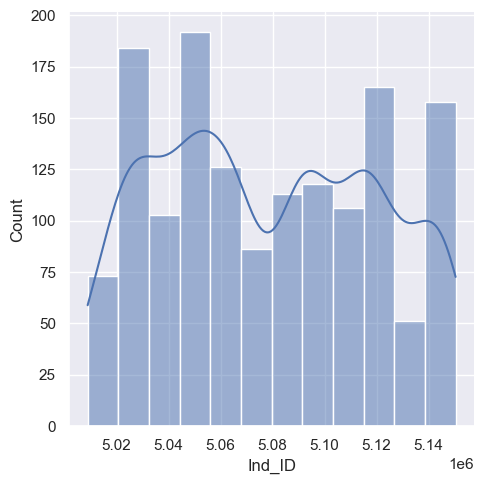

In [300]:
sns.displot(credit_card_final["Ind_ID"],kde=True)

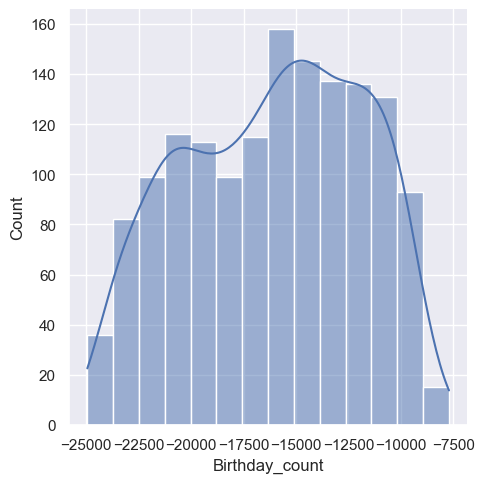

In [301]:
sns.displot(credit_card_final["Birthday_count"],kde=True)

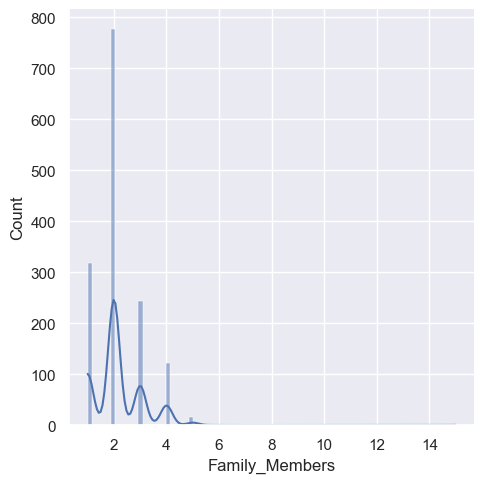

In [302]:
sns.displot(credit_card_final["Family_Members"],kde=True)

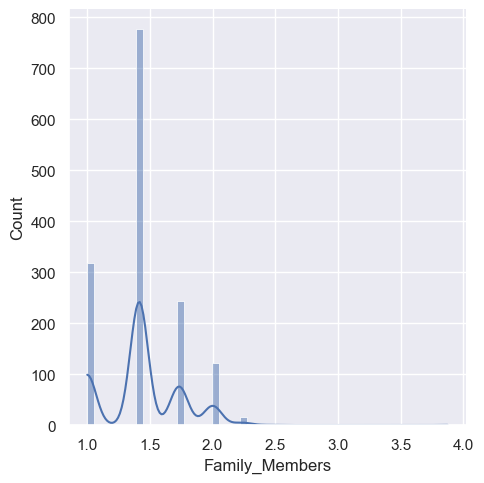

In [303]:
credit_card_final["Family_Members"]=np.sqrt(credit_card_final["Family_Members"])
sns.displot(credit_card_final["Family_Members"],kde=True)

In [304]:
credit_card_final.describe()

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.475000e+03  1475.000000    1475.000000     1475.000000   
mean   5.078449e+06     0.402712     409.451848   -16091.773452   
std    4.157671e+04     0.780873      84.884406     4215.147129   
min    5.008827e+06     0.000000     183.711731   -24946.000000   
25%    5.044964e+06     0.000000     342.052628   -19604.000000   
50%    5.069292e+06     0.000000     396.862697   -15825.000000   
75%    5.115609e+06     1.000000     474.341649   -12557.000000   
max    5.150412e+06    14.000000     600.000000    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1475.000000        1475.0  1475.000000  1475.000000  1475.000000   
mean    61162.461695           1.0     0.211525     0.304407     0.082712   
std    139414.623867           0.0     0.408529     0.460312     0.275540   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3169.500000           1.0     0.000000     0.000000     0.000000   
50%     -1569.000000           1.0     0.000000     0.000000     0.000000   
75%      -412.000000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members        label  
count     1475.000000  1475.000000  
mean         1.436336     0.106441  
std          0.304850     0.308505  
min          1.000000     0.000000  
25%          1.414214     0.000000  
50%          1.414214     0.000000  
75%          1.732051     0.000000  
max          3.872983     1.000000

C:\Users\HP\AppData\Local\Temp\ipykernel_17872\1392455167.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(credit_card_final.corr(),annot=True,linewidth=0.2)


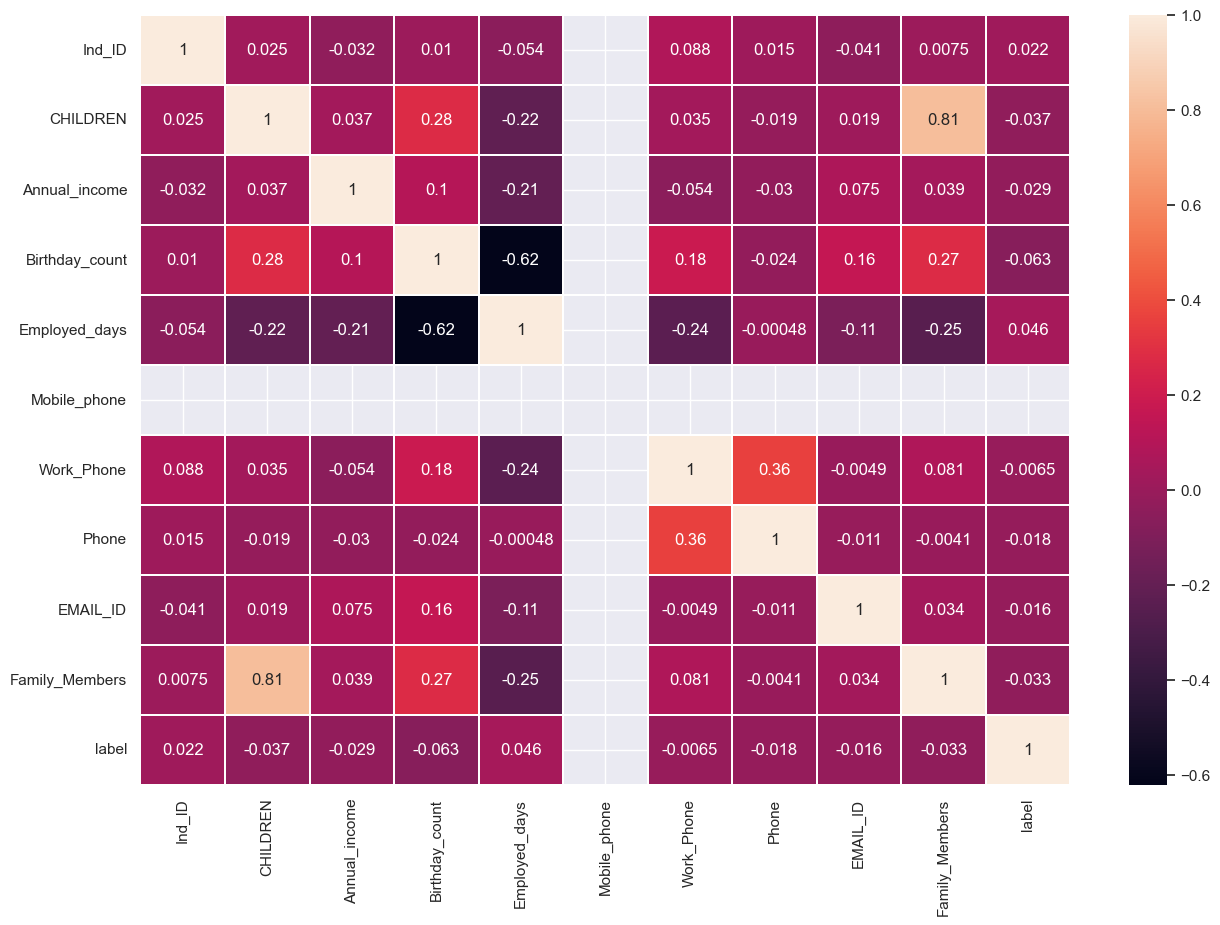

In [305]:
plt.figure(figsize=(15, 10))
sns.heatmap(credit_card_final.corr(),annot=True,linewidth=0.2)
plt.show() 

# 10. Feature Encoding Techniques(Dealing with Categorical Variables)

## Categorical Variables
Categorical variables are an essential part of any dataset. These variables present group information of observations containing similar information.

## Why Encoding is important

1. In real life, categorical or qualitative data may come as a string. We have to convert these categories into numbers, so machine learning algorithms can work.
2. However, we must have to be extremely careful with nominal-level data as these categories are unordered. If we convert them into numbers, such as 0, 1, or 2, it will greatly penalize the effectiveness of our model.
3. Values can be encoded by creating additional binary features corresponding to whether each value is picked or not.
4. Likewise while coding ordinal level data, we have to be sure that 0 should represent lowest order and 1 should be for more than 0 only.

There are many approaches, here we will discuss few commonly used approaches:
- One-hot encoding
- Dummy encoding
- Ordinal encoding
- Label encoding
- Binary encoding

In [306]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

In [307]:
credit_card_final.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

### 10.1 Binary Encoding

In [308]:
## Converting categorical data into numerical 
credit_card_final['GENDER'] = credit_card_final.GENDER.map({'M': 0, 'F':1})
credit_card_final["Car_Owner"]=credit_card_final.Car_Owner.map({"Y":1,"N":0})
credit_card_final["Propert_Owner"]=credit_card_final.Propert_Owner.map({"N":0,"Y":1})
credit_card_final

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       0          1              1         0     424.264069   
1     5009744       1          1              0         0     561.248608   
2     5009746       1          1              0         0     561.248608   
3     5009749       1          1              0         0     437.492087   
4     5009752       1          1              0         0     561.248608   
...       ...     ...        ...            ...       ...            ...   
1470  5028645       1          0              1         0     437.492087   
1471  5023655       1          0              0         0     474.341649   
1472  5115992       0          1              1         2     424.264069   
1473  5118219       0          1              0         0     519.615242   
1474  5053790       1          1              1         0     474.341649   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1470  Commercial associate               Higher education   
1471  Commercial associate              Incomplete higher   
1472               Working               Higher education   
1473               Working  Secondary / secondary special   
1474               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment   -18772.000000         365243   
1                  Married  House / apartment   -13557.000000           -586   
2                  Married  House / apartment   -16040.342071           -586   
3                  Married  House / apartment   -13557.000000           -586   
4                  Married  House / apartment   -13557.000000           -586   
...                    ...                ...             ...            ...   
1470               Married  House / apartment   -11957.000000          -2182   
1471  Single / not married  House / apartment   -10229.000000          -1209   
1472               Married  House / apartment   -13174.000000          -2477   
1473        Civil marriage  House / apartment   -15292.000000           -645   
1474               Married  House / apartment   -16601.000000          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0        Laborers   
1                1           1      1         0        Laborers   
2                1           1      1         0        Laborers   
3                1           1      1         0        Laborers   
4                1           1      1         0        Laborers   
...            ...         ...    ...       ...             ...   
1470             1           0      0         0        Managers   
1471             1           0      0         0     Accountants   
1472             1           0      0         0        Managers   
1473             1           1      1         0         Drivers   
1474             1           0      0         0        Laborers   

      Family_Members  label  
0           1.414214      1  
1           1.414214      1  
2           1.414214      1  
3           1.414214      1  
4           1.414214      1  
...              ...    ...  
1470        1.414214      0  
1471        1.000000      0  
1472        2.000000      0  
1473        1.414214      0  
1474        1.414214      0  

[1475 rows x 19 columns]

### 10.2 Ordinal Encoding

In [309]:
#ordinal
credit_card_final["EDUCATION"] =credit_card_final.EDUCATION.map({"Lower secondary":0,"Secondary / secondary special":1,"Incomplete higher":2,"Higher education":3,"Academic degree":4})

In [310]:
credit_card_final.head()

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0  5008827       0          1              1         0     424.264069   
1  5009744       1          1              0         0     561.248608   
2  5009746       1          1              0         0     561.248608   
3  5009749       1          1              0         0     437.492087   
4  5009752       1          1              0         0     561.248608   

            Type_Income  EDUCATION Marital_status       Housing_type  \
0             Pensioner          3        Married  House / apartment   
1  Commercial associate          3        Married  House / apartment   
2  Commercial associate          3        Married  House / apartment   
3  Commercial associate          3        Married  House / apartment   
4  Commercial associate          3        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0   -18772.000000         365243             1           0      0         0   
1   -13557.000000           -586             1           1      1         0   
2   -16040.342071           -586             1           1      1         0   
3   -13557.000000           -586             1           1      1         0   
4   -13557.000000           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0        Laborers        1.414214      1  
1        Laborers        1.414214      1  
2        Laborers        1.414214      1  
3        Laborers        1.414214      1  
4        Laborers        1.414214      1

### 10.3 Dummy Encoding(pd.get_dummies)

In [311]:
df_dum =pd.get_dummies(credit_card_final['Type_Income'],drop_first = True)

credit_card_final=pd.concat([credit_card_final,df_dum],axis=1)
credit_card_final.drop(columns=["Type_Income"],inplace=True)
credit_card_final

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       0          1              1         0     424.264069   
1     5009744       1          1              0         0     561.248608   
2     5009746       1          1              0         0     561.248608   
3     5009749       1          1              0         0     437.492087   
4     5009752       1          1              0         0     561.248608   
...       ...     ...        ...            ...       ...            ...   
1470  5028645       1          0              1         0     437.492087   
1471  5023655       1          0              0         0     474.341649   
1472  5115992       0          1              1         2     424.264069   
1473  5118219       0          1              0         0     519.615242   
1474  5053790       1          1              1         0     474.341649   

      EDUCATION        Marital_status       Housing_type  Birthday_count  ...  \
0             3               Married  House / apartment   -18772.000000  ...   
1             3               Married  House / apartment   -13557.000000  ...   
2             3               Married  House / apartment   -16040.342071  ...   
3             3               Married  House / apartment   -13557.000000  ...   
4             3               Married  House / apartment   -13557.000000  ...   
...         ...                   ...                ...             ...  ...   
1470          3               Married  House / apartment   -11957.000000  ...   
1471          2  Single / not married  House / apartment   -10229.000000  ...   
1472          3               Married  House / apartment   -13174.000000  ...   
1473          1        Civil marriage  House / apartment   -15292.000000  ...   
1474          3               Married  House / apartment   -16601.000000  ...   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID  Type_Occupation  \
0                1           0      0         0         Laborers   
1                1           1      1         0         Laborers   
2                1           1      1         0         Laborers   
3                1           1      1         0         Laborers   
4                1           1      1         0         Laborers   
...            ...         ...    ...       ...              ...   
1470             1           0      0         0         Managers   
1471             1           0      0         0      Accountants   
1472             1           0      0         0         Managers   
1473             1           1      1         0          Drivers   
1474             1           0      0         0         Laborers   

     Family_Members  label  Pensioner  State servant  Working  
0          1.414214      1          1              0        0  
1          1.414214      1          0              0        0  
2          1.414214      1          0              0        0  
3          1.414214      1          0              0        0  
4          1.414214      1          0              0        0  
...             ...    ...        ...            ...      ...  
1470       1.414214      0          0              0        0  
1471       1.000000      0          0              0        0  
1472       2.000000      0          0              0        1  
1473       1.414214      0          0              0        1  
1474       1.414214      0          0              0        1  

[1475 rows x 21 columns]

In [312]:
df_dum =pd.get_dummies(credit_card_final['Marital_status'],drop_first = True)

credit_card_final=pd.concat([credit_card_final,df_dum],axis=1)
credit_card_final.drop(columns=["Marital_status"],inplace=True)
credit_card_final

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       0          1              1         0     424.264069   
1     5009744       1          1              0         0     561.248608   
2     5009746       1          1              0         0     561.248608   
3     5009749       1          1              0         0     437.492087   
4     5009752       1          1              0         0     561.248608   
...       ...     ...        ...            ...       ...            ...   
1470  5028645       1          0              1         0     437.492087   
1471  5023655       1          0              0         0     474.341649   
1472  5115992       0          1              1         2     424.264069   
1473  5118219       0          1              0         0     519.615242   
1474  5053790       1          1              1         0     474.341649   

      EDUCATION       Housing_type  Birthday_count  Employed_days  ...  \
0             3  House / apartment   -18772.000000         365243  ...   
1             3  House / apartment   -13557.000000           -586  ...   
2             3  House / apartment   -16040.342071           -586  ...   
3             3  House / apartment   -13557.000000           -586  ...   
4             3  House / apartment   -13557.000000           -586  ...   
...         ...                ...             ...            ...  ...   
1470          3  House / apartment   -11957.000000          -2182  ...   
1471          2  House / apartment   -10229.000000          -1209  ...   
1472          3  House / apartment   -13174.000000          -2477  ...   
1473          1  House / apartment   -15292.000000           -645  ...   
1474          3  House / apartment   -16601.000000          -2859  ...   

      Type_Occupation  Family_Members  label  Pensioner State servant  \
0            Laborers        1.414214      1          1             0   
1            Laborers        1.414214      1          0             0   
2            Laborers        1.414214      1          0             0   
3            Laborers        1.414214      1          0             0   
4            Laborers        1.414214      1          0             0   
...               ...             ...    ...        ...           ...   
1470         Managers        1.414214      0          0             0   
1471      Accountants        1.000000      0          0             0   
1472         Managers        2.000000      0          0             0   
1473          Drivers        1.414214      0          0             0   
1474         Laborers        1.414214      0          0             0   

      Working  Married  Separated  Single / not married  Widow  
0           0        1          0                     0      0  
1           0        1          0                     0      0  
2           0        1          0                     0      0  
3           0        1          0                     0      0  
4           0        1          0                     0      0  
...       ...      ...        ...                   ...    ...  
1470        0        1          0                     0      0  
1471        0        0          0                     1      0  
1472        1        1          0                     0      0  
1473        1        0          0                     0      0  
1474        1        1          0                     0      0  

[1475 rows x 24 columns]

In [313]:
df_dum =pd.get_dummies(credit_card_final['Housing_type'],drop_first = True)

credit_card_final=pd.concat([credit_card_final,df_dum],axis=1)
credit_card_final.drop(columns=["Housing_type"],inplace=True)
credit_card_final

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       0          1              1         0     424.264069   
1     5009744       1          1              0         0     561.248608   
2     5009746       1          1              0         0     561.248608   
3     5009749       1          1              0         0     437.492087   
4     5009752       1          1              0         0     561.248608   
...       ...     ...        ...            ...       ...            ...   
1470  5028645       1          0              1         0     437.492087   
1471  5023655       1          0              0         0     474.341649   
1472  5115992       0          1              1         2     424.264069   
1473  5118219       0          1              0         0     519.615242   
1474  5053790       1          1              1         0     474.341649   

      EDUCATION  Birthday_count  Employed_days  Mobile_phone  ...  Working  \
0             3   -18772.000000         365243             1  ...        0   
1             3   -13557.000000           -586             1  ...        0   
2             3   -16040.342071           -586             1  ...        0   
3             3   -13557.000000           -586             1  ...        0   
4             3   -13557.000000           -586             1  ...        0   
...         ...             ...            ...           ...  ...      ...   
1470          3   -11957.000000          -2182             1  ...        0   
1471          2   -10229.000000          -1209             1  ...        0   
1472          3   -13174.000000          -2477             1  ...        1   
1473          1   -15292.000000           -645             1  ...        1   
1474          3   -16601.000000          -2859             1  ...        1   

      Married  Separated Single / not married  Widow  House / apartment  \
0           1          0                    0      0                  1   
1           1          0                    0      0                  1   
2           1          0                    0      0                  1   
3           1          0                    0      0                  1   
4           1          0                    0      0                  1   
...       ...        ...                  ...    ...                ...   
1470        1          0                    0      0                  1   
1471        0          0                    1      0                  1   
1472        1          0                    0      0                  1   
1473        0          0                    0      0                  1   
1474        1          0                    0      0                  1   

      Municipal apartment  Office apartment  Rented apartment  With parents  
0                       0                 0                 0             0  
1                       0                 0                 0             0  
2                       0                 0                 0             0  
3                       0                 0                 0             0  
4                       0                 0                 0             0  
...                   ...               ...               ...           ...  
1470                    0                 0                 0             0  
1471                    0                 0                 0             0  
1472                    0                 0                 0             0  
1473                    0                 0                 0             0  
1474                    0                 0                 0             0  

[1475 rows x 28 columns]

In [314]:
df_dum =pd.get_dummies(credit_card_final['Type_Occupation'],drop_first = True)

credit_card_final=pd.concat([credit_card_final,df_dum],axis=1)
credit_card_final.drop(columns=["Type_Occupation"],inplace=True)
credit_card_final

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       0          1              1         0     424.264069   
1     5009744       1          1              0         0     561.248608   
2     5009746       1          1              0         0     561.248608   
3     5009749       1          1              0         0     437.492087   
4     5009752       1          1              0         0     561.248608   
...       ...     ...        ...            ...       ...            ...   
1470  5028645       1          0              1         0     437.492087   
1471  5023655       1          0              0         0     474.341649   
1472  5115992       0          1              1         2     424.264069   
1473  5118219       0          1              0         0     519.615242   
1474  5053790       1          1              1         0     474.341649   

      EDUCATION  Birthday_count  Employed_days  Mobile_phone  ...  Laborers  \
0             3   -18772.000000         365243             1  ...         1   
1             3   -13557.000000           -586             1  ...         1   
2             3   -16040.342071           -586             1  ...         1   
3             3   -13557.000000           -586             1  ...         1   
4             3   -13557.000000           -586             1  ...         1   
...         ...             ...            ...           ...  ...       ...   
1470          3   -11957.000000          -2182             1  ...         0   
1471          2   -10229.000000          -1209             1  ...         0   
1472          3   -13174.000000          -2477             1  ...         0   
1473          1   -15292.000000           -645             1  ...         0   
1474          3   -16601.000000          -2859             1  ...         1   

      Low-skill Laborers  Managers  Medicine staff  Private service staff  \
0                      0         0               0                      0   
1                      0         0               0                      0   
2                      0         0               0                      0   
3                      0         0               0                      0   
4                      0         0               0                      0   
...                  ...       ...             ...                    ...   
1470                   0         1               0                      0   
1471                   0         0               0                      0   
1472                   0         1               0                      0   
1473                   0         0               0                      0   
1474                   0         0               0                      0   

      Realty agents  Sales staff  Secretaries  Security staff  \
0                 0            0            0               0   
1                 0            0            0               0   
2                 0            0            0               0   
3                 0            0            0               0   
4                 0            0            0               0   
...             ...          ...          ...             ...   
1470              0            0            0               0   
1471              0            0            0               0   
1472              0            0            0               0   
1473              0            0            0               0   
1474              0            0            0               0   

      Waiters/barmen staff  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
1470                     0  
1471                     0  
1472                     0  
1473                     0  
1474                     0  

[1475 rows x 44 columns]

In [315]:
credit_card_final.head()

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0  5008827       0          1              1         0     424.264069   
1  5009744       1          1              0         0     561.248608   
2  5009746       1          1              0         0     561.248608   
3  5009749       1          1              0         0     437.492087   
4  5009752       1          1              0         0     561.248608   

   EDUCATION  Birthday_count  Employed_days  Mobile_phone  ...  Laborers  \
0          3   -18772.000000         365243             1  ...         1   
1          3   -13557.000000           -586             1  ...         1   
2          3   -16040.342071           -586             1  ...         1   
3          3   -13557.000000           -586             1  ...         1   
4          3   -13557.000000           -586             1  ...         1   

   Low-skill Laborers  Managers  Medicine staff  Private service staff  \
0                   0         0               0                      0   
1                   0         0               0                      0   
2                   0         0               0                      0   
3                   0         0               0                      0   
4                   0         0               0                      0   

   Realty agents  Sales staff  Secretaries  Security staff  \
0              0            0            0               0   
1              0            0            0               0   
2              0            0            0               0   
3              0            0            0               0   
4              0            0            0               0   

   Waiters/barmen staff  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 44 columns]

In [316]:
credit_card_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ind_ID                 1475 non-null   int64  
 1   GENDER                 1475 non-null   int64  
 2   Car_Owner              1475 non-null   int64  
 3   Propert_Owner          1475 non-null   int64  
 4   CHILDREN               1475 non-null   int64  
 5   Annual_income          1475 non-null   float64
 6   EDUCATION              1475 non-null   int64  
 7   Birthday_count         1475 non-null   float64
 8   Employed_days          1475 non-null   int64  
 9   Mobile_phone           1475 non-null   int64  
 10  Work_Phone             1475 non-null   int64  
 11  Phone                  1475 non-null   int64  
 12  EMAIL_ID               1475 non-null   int64  
 13  Family_Members         1475 non-null   float64
 14  label                  1475 non-null   int64  
 15  Pens

In [317]:
## after doing encoding i converted it into other dataset so that i can avoid confusion
credit_card_final.to_csv("credit_card_ML.csv",index=False)

In [338]:
credit_card_Ml=pd.read_csv("credit_card_Ml.csv")

In [339]:
credit_card_Ml.head()

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0  5008827       0          1              1         0     424.264069   
1  5009744       1          1              0         0     561.248608   
2  5009746       1          1              0         0     561.248608   
3  5009749       1          1              0         0     437.492087   
4  5009752       1          1              0         0     561.248608   

   EDUCATION  Birthday_count  Employed_days  Mobile_phone  ...  Laborers  \
0          3   -18772.000000         365243             1  ...         1   
1          3   -13557.000000           -586             1  ...         1   
2          3   -16040.342071           -586             1  ...         1   
3          3   -13557.000000           -586             1  ...         1   
4          3   -13557.000000           -586             1  ...         1   

   Low-skill Laborers  Managers  Medicine staff  Private service staff  \
0                   0         0               0                      0   
1                   0         0               0                      0   
2                   0         0               0                      0   
3                   0         0               0                      0   
4                   0         0               0                      0   

   Realty agents  Sales staff  Secretaries  Security staff  \
0              0            0            0               0   
1              0            0            0               0   
2              0            0            0               0   
3              0            0            0               0   
4              0            0            0               0   

   Waiters/barmen staff  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 44 columns]

# 11.Feature Selection

### 11.1 Variance Threshold
feature selector that remove all low-variance feature
this feature selection algortm looks only at the independent variable,not to ouput variable
used for unsupervised

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [340]:
X=credit_card_Ml.drop(labels=['label'], axis=1)
y=credit_card_Ml['label']

In [341]:
X

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       0          1              1         0     424.264069   
1     5009744       1          1              0         0     561.248608   
2     5009746       1          1              0         0     561.248608   
3     5009749       1          1              0         0     437.492087   
4     5009752       1          1              0         0     561.248608   
...       ...     ...        ...            ...       ...            ...   
1470  5028645       1          0              1         0     437.492087   
1471  5023655       1          0              0         0     474.341649   
1472  5115992       0          1              1         2     424.264069   
1473  5118219       0          1              0         0     519.615242   
1474  5053790       1          1              1         0     474.341649   

      EDUCATION  Birthday_count  Employed_days  Mobile_phone  ...  Laborers  \
0             3   -18772.000000         365243             1  ...         1   
1             3   -13557.000000           -586             1  ...         1   
2             3   -16040.342071           -586             1  ...         1   
3             3   -13557.000000           -586             1  ...         1   
4             3   -13557.000000           -586             1  ...         1   
...         ...             ...            ...           ...  ...       ...   
1470          3   -11957.000000          -2182             1  ...         0   
1471          2   -10229.000000          -1209             1  ...         0   
1472          3   -13174.000000          -2477             1  ...         0   
1473          1   -15292.000000           -645             1  ...         0   
1474          3   -16601.000000          -2859             1  ...         1   

      Low-skill Laborers  Managers  Medicine staff  Private service staff  \
0                      0         0               0                      0   
1                      0         0               0                      0   
2                      0         0               0                      0   
3                      0         0               0                      0   
4                      0         0               0                      0   
...                  ...       ...             ...                    ...   
1470                   0         1               0                      0   
1471                   0         0               0                      0   
1472                   0         1               0                      0   
1473                   0         0               0                      0   
1474                   0         0               0                      0   

      Realty agents  Sales staff  Secretaries  Security staff  \
0                 0            0            0               0   
1                 0            0            0               0   
2                 0            0            0               0   
3                 0            0            0               0   
4                 0            0            0               0   
...             ...          ...          ...             ...   
1470              0            0            0               0   
1471              0            0            0               0   
1472              0            0            0               0   
1473              0            0            0               0   
1474              0            0            0               0   

      Waiters/barmen staff  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
1470                     0  
1471                     0  
1472                     0  
1473                     0  
1474                     0  

[1475 rows x 43 columns]

In [342]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1470    0
1471    0
1472    0
1473    0
1474    0
Name: label, Length: 1475, dtype: int64

In [343]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    credit_card_Ml.drop(labels=['label'], axis=1),
    credit_card_Ml['label'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1032, 43), (443, 43))

In [324]:
## Lets apply the variance threshold

In [344]:
## zero variance feature
## to avoid overfitting we can split the dataset into train and test data
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

VarianceThreshold(threshold=0)

In [345]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [346]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True])

In [347]:
### Finding non constant features
sum(var_thres.get_support())

41

In [348]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [1]:
for column in constant_columns:
    print(column)

NameError: name 'constant_columns' is not defined

### Observation:
    from zero variance feature we can say that Mobile_phone and Realty agents are having variance =0 , so now we can remove it from train and test input

In [350]:
X_train=X_train.drop(constant_columns,axis=1,inplace=True)

In [351]:
X_test=X_test.drop(constant_columns,axis=1,inplace=True)

In [352]:
X_train

In [353]:
X_train.shape, X_test.shape   # 43 to 41

AttributeError: 'NoneType' object has no attribute 'shape'

### 11.2. Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated

In [170]:
X_train.corr()

Ind_ID    GENDER  Car_Owner  Propert_Owner  CHILDREN  \
Ind_ID                 1.000000 -0.027575  -0.054250      -0.076719  0.028759   
GENDER                -0.027575  1.000000  -0.353590       0.045496 -0.050261   
Car_Owner             -0.054250 -0.353590   1.000000      -0.039004  0.058327   
Propert_Owner         -0.076719  0.045496  -0.039004       1.000000  0.009074   
CHILDREN               0.028759 -0.050261   0.058327       0.009074  1.000000   
Annual_income         -0.044992 -0.279762   0.225439       0.001217  0.041703   
EDUCATION             -0.057723 -0.037440   0.127067      -0.011200  0.103457   
Birthday_count         0.011317 -0.202788   0.146704      -0.118432  0.313917   
Employed_days         -0.074505  0.194743  -0.147634       0.092030 -0.234231   
Work_Phone             0.121472 -0.044526   0.008848      -0.183047  0.047181   
Phone                  0.047576  0.033069   0.002625      -0.092684  0.022939   
EMAIL_ID              -0.073155  0.059302   0.005638       0.075900  0.045888   
Family_Members         0.012646 -0.103642   0.138363       0.015780  0.819478   
Pensioner             -0.077361  0.190359  -0.148693       0.096809 -0.233597   
State servant          0.035127  0.018919   0.017457      -0.018322  0.055239   
Working                0.033838 -0.098998   0.050796      -0.078300  0.092241   
Married               -0.017560 -0.093940   0.175905       0.008235  0.157434   
Separated              0.041115  0.090769  -0.038647      -0.007268 -0.018824   
Single / not married  -0.024268 -0.017611  -0.110338      -0.003137 -0.137419   
Widow                 -0.002153  0.158621  -0.117087      -0.017901 -0.096361   
House / apartment     -0.064834  0.054652   0.012327       0.210240  0.008636   
Municipal apartment    0.091114  0.040899  -0.062448      -0.110545 -0.037144   
Office apartment      -0.006614  0.002622   0.031172      -0.036408 -0.030286   
Rented apartment      -0.022932 -0.094374   0.006941      -0.033916 -0.007787   
With parents           0.023454 -0.055915   0.032109      -0.163040  0.037660   
Cleaning staff         0.047506  0.080748  -0.030230       0.040877 -0.009543   
Cooking staff          0.017967  0.044300  -0.018861      -0.007669 -0.014751   
Core staff            -0.009179  0.101005  -0.063285       0.002834  0.065479   
Drivers               -0.003753 -0.294210   0.167396       0.003085  0.006518   
HR staff               0.009132  0.040197  -0.005804      -0.036408  0.046320   
High skill tech staff  0.023199  0.023622   0.004151      -0.021663  0.041279   
IT staff              -0.020283  0.023185  -0.024676       0.022649 -0.017469   
Laborers              -0.082547 -0.073787  -0.029194      -0.003781 -0.130724   
Low-skill Laborers    -0.011344 -0.018676  -0.049423       0.012580  0.009262   
Managers              -0.014193 -0.101922   0.105318       0.012755  0.053323   
Medicine staff         0.067858  0.123807  -0.008223      -0.029922  0.054334   
Private service staff  0.048077  0.065801  -0.001936       0.041053  0.044474   
Sales staff            0.018192  0.143989  -0.068395       0.007572  0.037254   
Secretaries            0.020037  0.056930  -0.034405       0.002025  0.047519   
Security staff         0.054600 -0.103070  -0.067202       0.041797 -0.003623   
Waiters/barmen staff   0.056170  0.046438  -0.049423      -0.020204 -0.012863   

                       Annual_income  EDUCATION  Birthday_count  \
Ind_ID                     -0.044992  -0.057723        0.011317   
GENDER                     -0.279762  -0.037440       -0.202788   
Car_Owner                   0.225439   0.127067        0.146704   
Propert_Owner               0.001217  -0.011200       -0.118432   
CHILDREN                    0.041703   0.103457        0.313917   
Annual_income               1.000000   0.238512        0.121143   
EDUCATION                   0.238512   1.000000        0.190442   
Birthday_count              0.121143   0.190442        1.000000   
Employed_days      

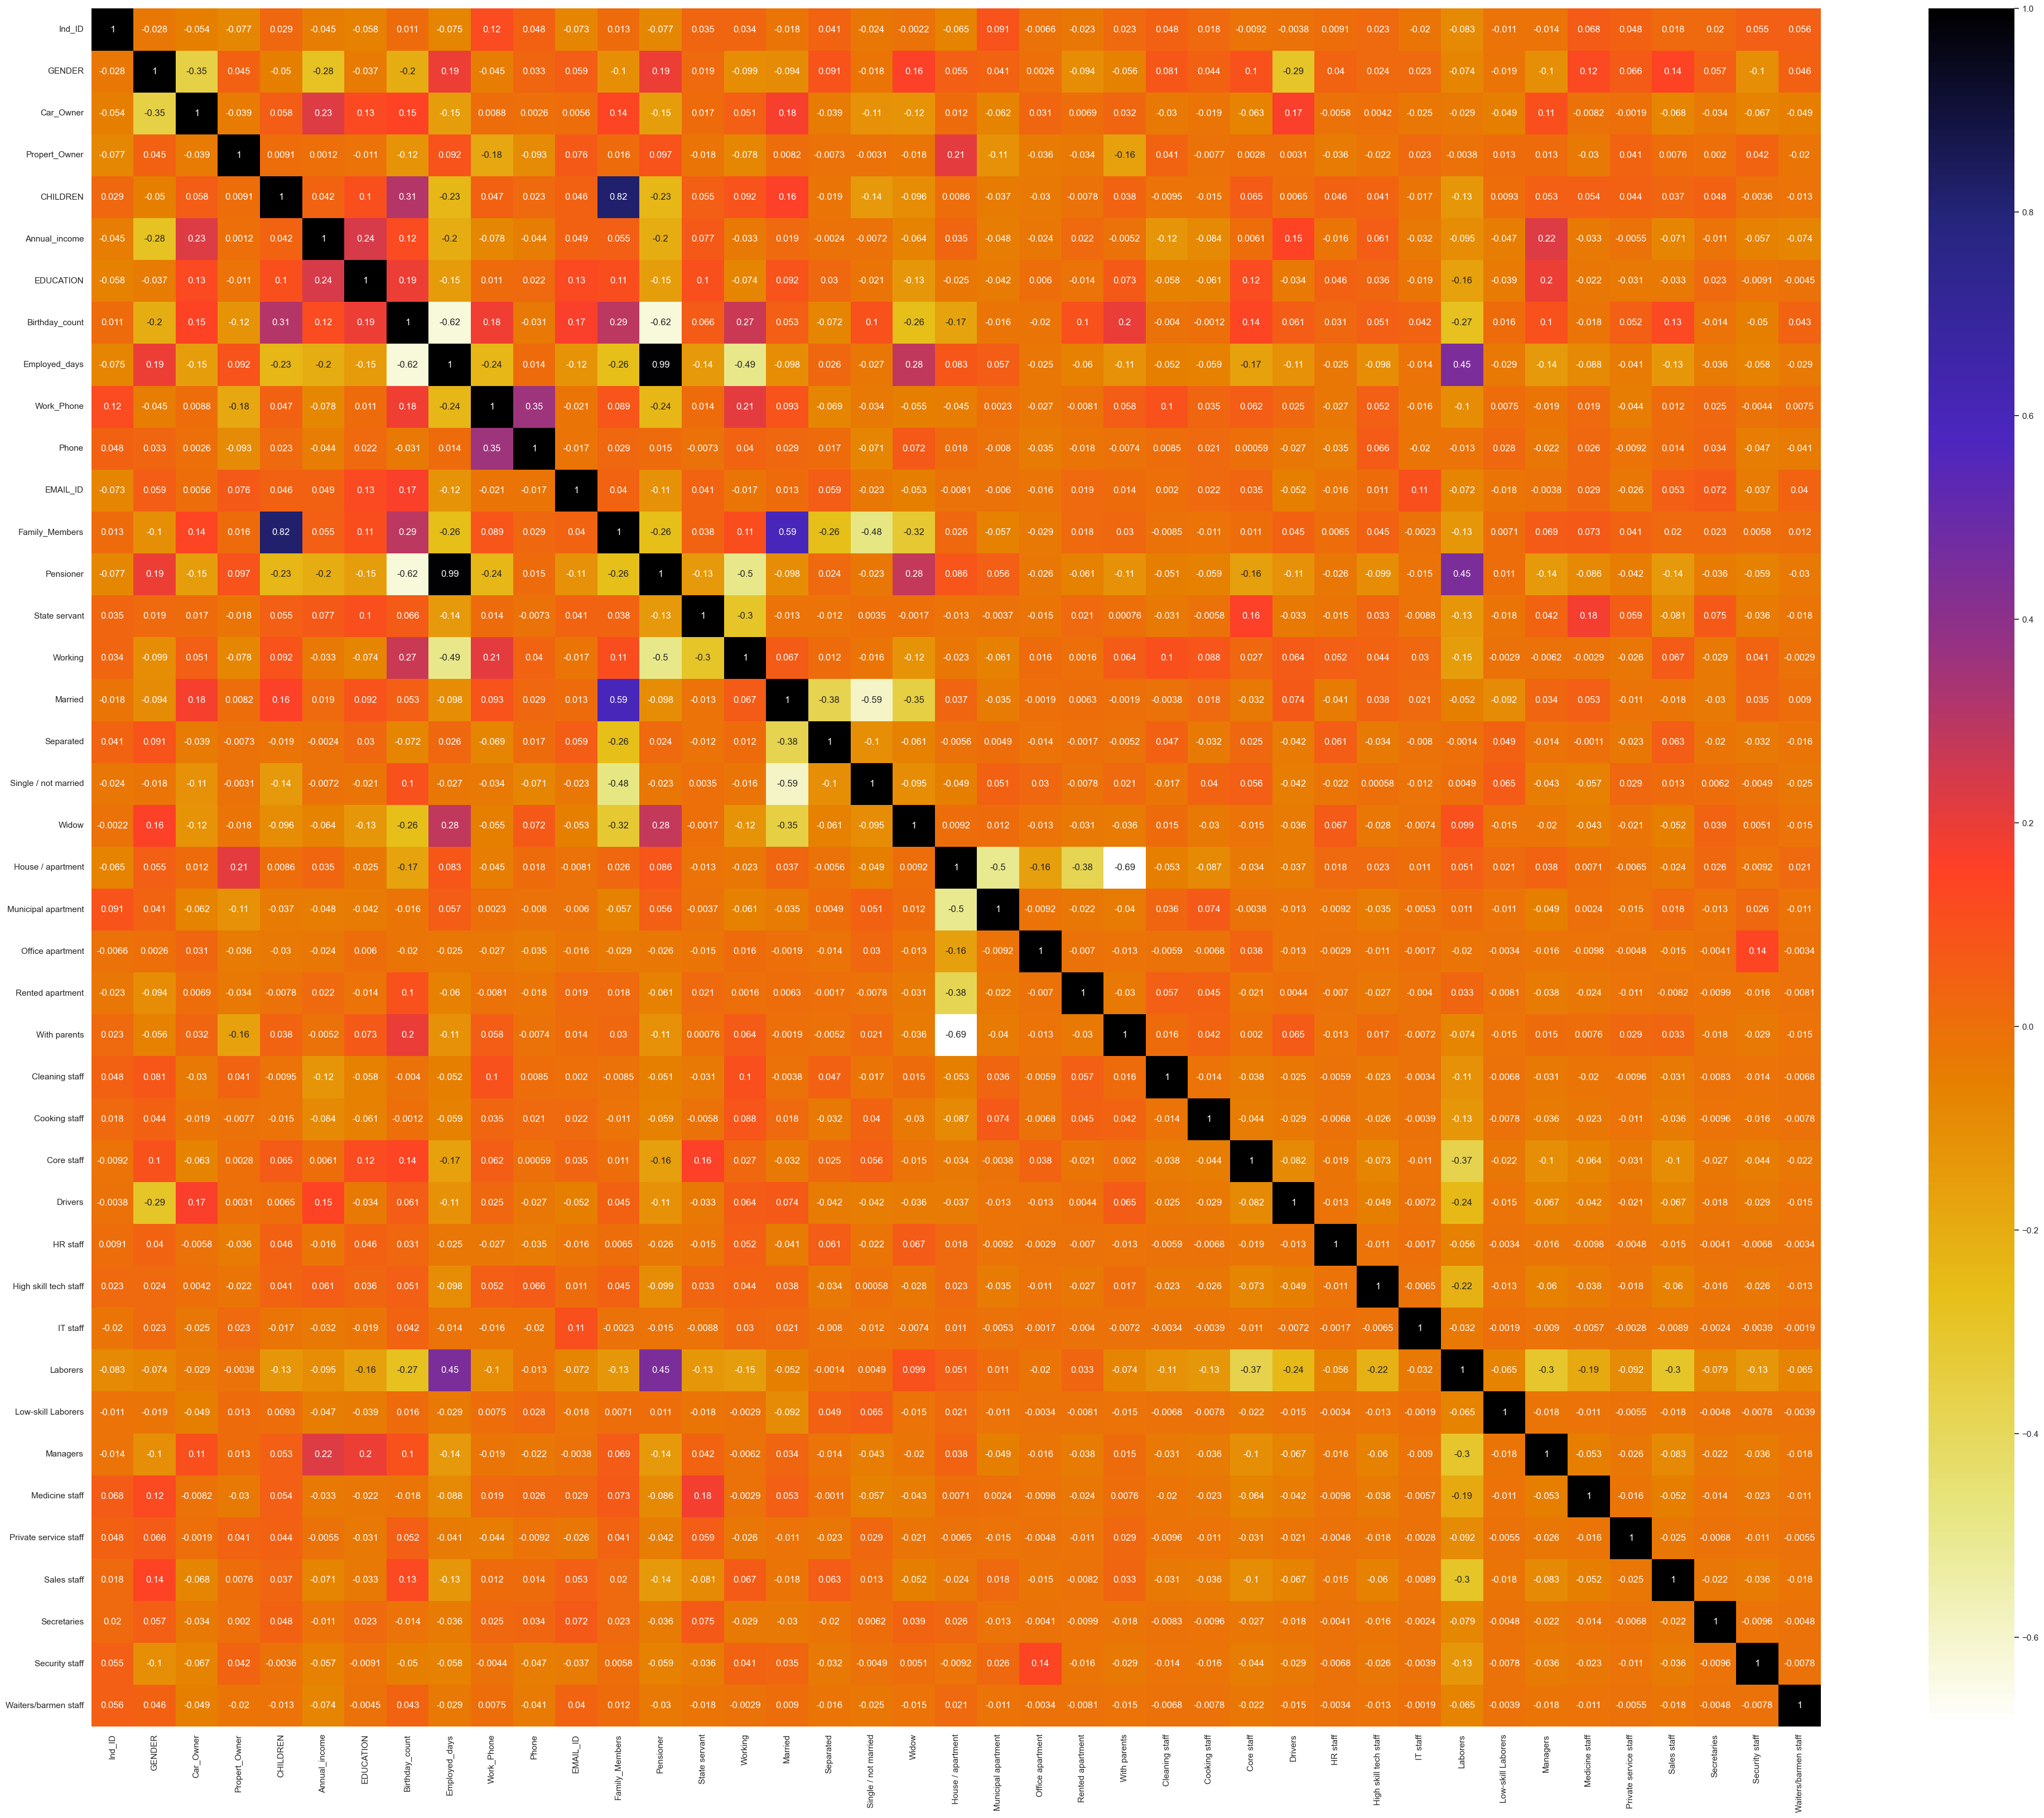

In [171]:
#Using Pearson Correlation
plt.figure(figsize=(50,40))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [174]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [175]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

1

In [176]:
corr_features ## pensioner with employed_day having 0.99 correlation

{'Pensioner'}

In [177]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [178]:
X_train.shape, X_test.shape ## shape change from 41 to 40

((1032, 40), (443, 40))

## 11.3 Feature Selection-Information gain - mutual information In Classification Problem Statements

Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.


In [180]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.02935561, 0.        , 0.01084207, 0.        , 0.01217983,
       0.0086601 , 0.0034439 , 0.0323173 , 0.03109779, 0.00375466,
       0.        , 0.00737113, 0.00893587, 0.        , 0.        ,
       0.0202941 , 0.        , 0.        , 0.01790187, 0.        ,
       0.        , 0.0038045 , 0.01299374, 0.        , 0.        ,
       0.        , 0.        , 0.01045981, 0.00342567, 0.00345233,
       0.00911307, 0.        , 0.01082022, 0.        , 0.01019145,
       0.        , 0.01700901, 0.00177261, 0.0059376 , 0.        ])

In [183]:
## The data get sorted into descending order 
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Birthday_count           0.032317
Employed_days            0.031098
Ind_ID                   0.029356
Married                  0.020294
Widow                    0.017902
Sales staff              0.017009
Rented apartment         0.012994
CHILDREN                 0.012180
Car_Owner                0.010842
Low-skill Laborers       0.010820
Drivers                  0.010460
Medicine staff           0.010191
IT staff                 0.009113
Family_Members           0.008936
Annual_income            0.008660
EMAIL_ID                 0.007371
Security staff           0.005938
Office apartment         0.003804
Work_Phone               0.003755
High skill tech staff    0.003452
EDUCATION                0.003444
HR staff                 0.003426
Secretaries              0.001773
Laborers                 0.000000
Managers                 0.000000
Private service staff    0.000000
Municipal apartment      0.000000
Core staff               0.000000
Cooking staff            0.000000
Cleaning staff

<Axes: >

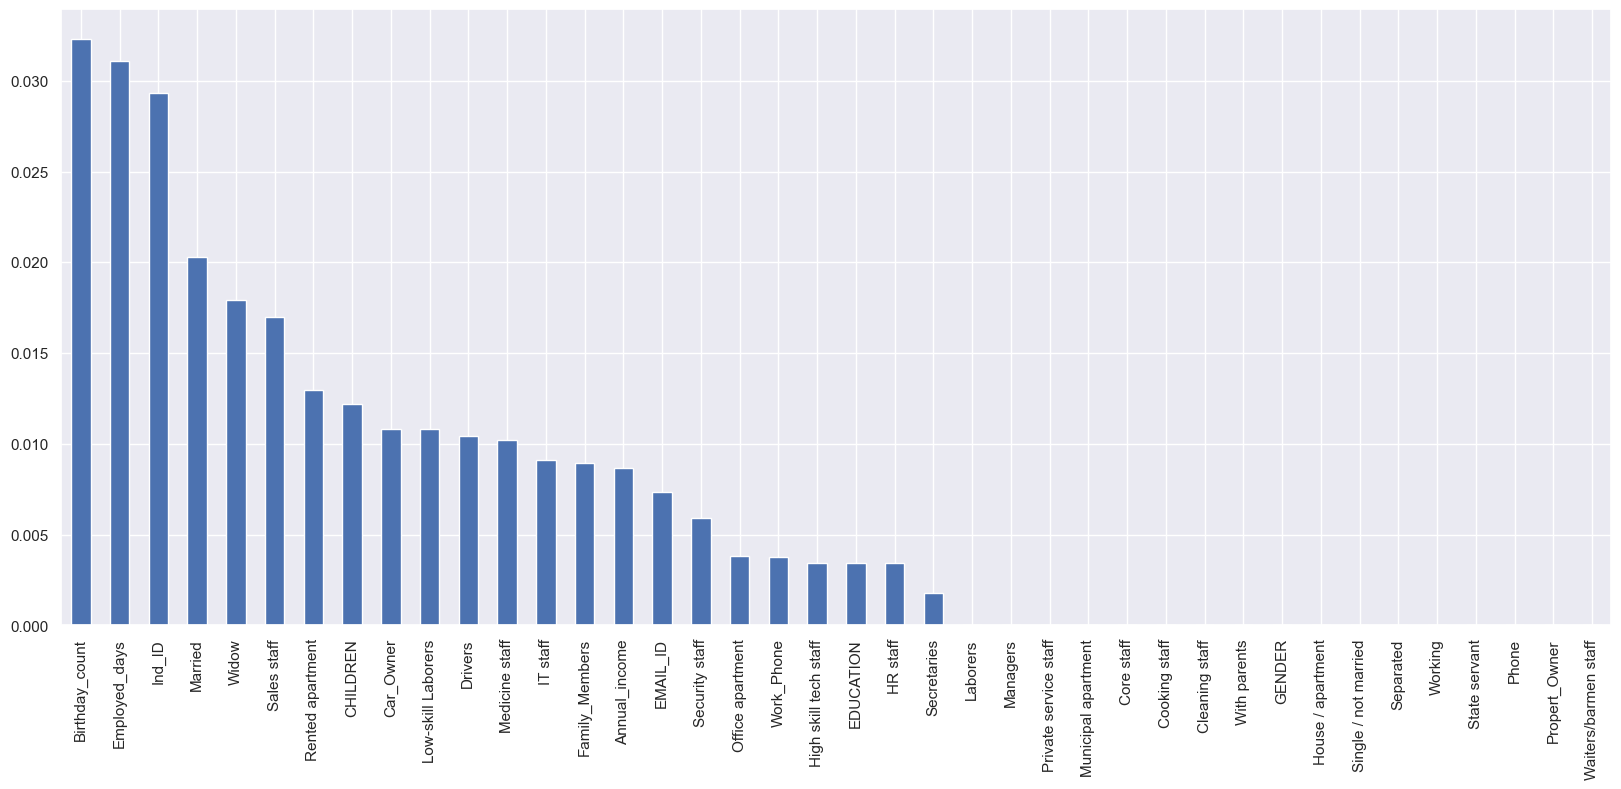

In [182]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

### Observation:
The mutual information is high for Birthday_count and least for laborers

In [185]:
## from selectkbest we can select the best mutual information 
from sklearn.feature_selection import SelectKBest

In [188]:
#Now we Will select the  top 20 important features
# i did not select the feature EDUCATION--0.003444,HR staff--0.003426 ,secretaries--0.001773 and laborers--0
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Ind_ID', 'Birthday_count', 'Employed_days', 'Work_Phone',
       'Family_Members', 'Married', 'Rented apartment', 'With parents',
       'Cleaning staff', 'Core staff', 'Drivers', 'HR staff',
       'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Sales staff', 'Secretaries', 'Security staff',
       'Waiters/barmen staff'],
      dtype='object')

In [192]:
X_train

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
269   5022756       1          0              0         1     450.000000   
759   5037125       0          1              0         0     424.264069   
936   5024148       1          1              0         0     424.264069   
901   5036765       1          0              0         1     335.410197   
610   5050852       0          0              0         0     424.264069   
...       ...     ...        ...            ...       ...            ...   
763   5009146       0          1              0         0     561.248608   
835   5022189       1          0              0         1     367.423461   
1216  5149647       1          0              1         0     540.832691   
559   5026178       0          1              1         0     367.423461   
684   5090871       1          0              0         2     474.341649   

      EDUCATION  Birthday_count  Employed_days  Work_Phone  ...  IT staff  \
269           1        -10800.0          -3166           0  ...         0   
759           3        -11664.0          -2227           0  ...         0   
936           3        -11380.0          -1007           1  ...         0   
901           1        -12834.0          -1224           0  ...         0   
610           3         -9488.0          -1505           0  ...         0   
...         ...             ...            ...         ...  ...       ...   
763           3        -15825.0          -3720           1  ...         0   
835           1        -15170.0          -7979           0  ...         0   
1216          1        -22576.0         365243           0  ...         0   
559           1        -19171.0          -7804           1  ...         0   
684           1        -14172.0          -1130           0  ...         0   

      Laborers  Low-skill Laborers  Managers  Medicine staff  \
269          0                   0         0               0   
759          0                   0         0               0   
936          0                   0         0               0   
901          1                   0         0               0   
610          0                   0         0               0   
...        ...                 ...       ...             ...   
763          0                   0         1               0   
835          0                   0         0               0   
1216         1                   0         0               0   
559          1                   0         0               0   
684          0                   0         0               1   

      Private service staff  Sales staff  Secretaries  Security staff  \
269                       0            1            0               0   
759                       0            0            0               0   
936                       0            0            0               0   
901                       0            0            0               0   
610                       0            0            0               0   
...                     ...          ...          ...             ...   
763                       0            0            0               0   
835                       0            0            0               0   
1216                      0            0            0               0   
559                       0            0            0               0   
684                       0            0            0               0   

      Waiters/barmen staff  
269                      0  
759                      0  
936                      0  
901                      0  
610                      0  
...                    ...  
763                      0  
835                      0  
1216                     0  
559                      0  
684                      0  

[1032 rows x 40 columns]

In [195]:
# now we can drop the four col from the input side
#EDUCATION,HR staff,secretaries and laborers
X_train=X_train.drop(["EDUCATION","HR staff","Secretaries","Laborers"],axis=1)
X_test=X_test.drop(["EDUCATION","HR staff","Secretaries","Laborers"],axis=1)

### Observation:
EDUCATION,HR staff,Secretaries and Laborers having least mutual information so I am removing it

In [197]:
X_train.shape, X_test.shape ## 40 to 36 columns

((1032, 36), (443, 36))

## 11.4 Categorical input and Numerical output
Befor this i have to encode categorical data into numerical data

#### Chisquare Test For Feature Selection
Compute chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task.
This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [199]:
x=credit_card_Ml.drop(columns=["Ind_ID","Annual_income",'label',"Birthday_count","Employed_days","Mobile_phone","Work_Phone","Phone","EMAIL_ID","Family_Members"], axis=1)
Y=credit_card_Ml['label']

In [201]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=100)

In [204]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(x_train,Y_train)

In [206]:
f_p_values

(array([1.71846058e-01, 1.88991927e-03, 1.42792497e-02, 3.19719330e+00,
        5.53247920e-02, 6.07117660e+00, 2.34621422e+00, 8.10068629e-01,
        4.62934888e-02, 7.19062554e-01, 1.27525730e+00, 1.74830264e-03,
        6.50525478e-01, 1.70581016e+01, 7.82890284e-01, 1.20343621e+00,
        1.44178314e+00, 3.16986734e-02, 2.66041172e+00, 7.66301042e-01,
        2.23521704e-03, 3.74642517e-01, 2.28231419e-02, 1.60152672e+01,
        4.29682810e-01, 3.00477130e+00, 5.39649444e-01, 1.60912903e+00,
        1.62345091e+00, 1.24880839e-01, 1.63606329e+00, 8.74165872e-01,
        4.45618337e+00, 3.74642517e-01]),
 array([6.78476342e-01, 9.65324326e-01, 9.04882556e-01, 7.37647611e-02,
        8.14044016e-01, 1.37405399e-02, 1.25587672e-01, 3.68099961e-01,
        8.29643186e-01, 3.96451581e-01, 2.58782727e-01, 9.66648004e-01,
        4.19924870e-01, 3.62533757e-05, 3.76258643e-01, 2.72635972e-01,
        2.29851008e-01, 8.58690610e-01, 1.02874103e-01, 3.81363793e-01,
        9.62291597e-01

In [207]:
p_values=pd.Series(f_p_values[1])
p_values.index=x_train.columns
p_values

GENDER                   0.678476
Car_Owner                0.965324
Propert_Owner            0.904883
CHILDREN                 0.073765
EDUCATION                0.814044
Pensioner                0.013741
State servant            0.125588
Working                  0.368100
Married                  0.829643
Separated                0.396452
Single / not married     0.258783
Widow                    0.966648
House / apartment        0.419925
Municipal apartment      0.000036
Office apartment         0.376259
Rented apartment         0.272636
With parents             0.229851
Cleaning staff           0.858691
Cooking staff            0.102874
Core staff               0.381364
Drivers                  0.962292
HR staff                 0.540485
High skill tech staff    0.879918
IT staff                 0.000063
Laborers                 0.512145
Low-skill Laborers       0.083020
Managers                 0.462578
Medicine staff           0.204614
Private service staff    0.202611
Realty agents 

In [208]:
p_values.sort_index(ascending=False) # Widow,Rented apartment,Rented apartment,Realty agents,Propert_Owner,Propert_Owner,Married,GENDER,EDUCATION,Drivers,Car_Owner
## important col-Waiters/barmen staff,Single / not married,HR staff
print(p_values.sort_index(ascending=True))
(p_values.sort_index(ascending=False)*10)<=5

CHILDREN                 0.073765
Car_Owner                0.965324
Cleaning staff           0.858691
Cooking staff            0.102874
Core staff               0.381364
Drivers                  0.962292
EDUCATION                0.814044
GENDER                   0.678476
HR staff                 0.540485
High skill tech staff    0.879918
House / apartment        0.419925
IT staff                 0.000063
Laborers                 0.512145
Low-skill Laborers       0.083020
Managers                 0.462578
Married                  0.829643
Medicine staff           0.204614
Municipal apartment      0.000036
Office apartment         0.376259
Pensioner                0.013741
Private service staff    0.202611
Propert_Owner            0.904883
Realty agents            0.723800
Rented apartment         0.272636
Sales staff              0.200866
Secretaries              0.349805
Security staff           0.034775
Separated                0.396452
Single / not married     0.258783
State servant 

Working                   True
With parents              True
Widow                    False
Waiters/barmen staff     False
State servant             True
Single / not married      True
Separated                 True
Security staff            True
Secretaries               True
Sales staff               True
Rented apartment          True
Realty agents            False
Propert_Owner            False
Private service staff     True
Pensioner                 True
Office apartment          True
Municipal apartment       True
Medicine staff            True
Married                  False
Managers                  True
Low-skill Laborers        True
Laborers                 False
IT staff                  True
House / apartment         True
High skill tech staff    False
HR staff                 False
GENDER                   False
EDUCATION                False
Drivers                  False
Core staff                True
Cooking staff             True
Cleaning staff           False
Car_Owne

### Observation:
this below col having less then 0.5 less p values ,so now i am going to remove this columns from the train and test data

Widow ,Waiters/barmen staff,Realty agents,Propert_Owner,Married,Laborers,High skill tech staff,HR staff,GENDER,EDUCATION,Drivers,Cleaning staff,Car_Owner


This below col are already removed from previous feature selection method

#education,hr staff,secretaries,labours,Mobile_phone,Realty agents,pensioner


In [210]:
X_train=X_train.drop(["Widow","Waiters/barmen staff","Propert_Owner","Married","High skill tech staff","GENDER","Drivers","Cleaning staff","Car_Owner"],axis=1)
X_test=X_test.drop(["Widow","Waiters/barmen staff","Propert_Owner","Married","High skill tech staff","GENDER","Drivers","Cleaning staff","Car_Owner"],axis=1)

KeyError: "['Widow', 'Waiters/barmen staff', 'Propert_Owner', 'Married', 'High skill tech staff', 'GENDER', 'Drivers', 'Cleaning staff', 'Car_Owner'] not found in axis"

In [211]:
X_train.shape, X_test.shape # now the columns got reduce from 36 to 27 

((1032, 27), (443, 27))

### Over all Observation:

  * After performing feature selection and comparing independent variables with dependent variable we can select few input         columns which are having high correlation with output columns
  * Our columns got reduces from  43 to 27

# 12. Feature Scaling

In [215]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-1.36934982,  0.85785536,  0.49159209, ..., -0.08838835,
         3.49725167, -0.12549116],
       [-1.02432787, -0.56090543,  0.18738884, ..., -0.08838835,
        -0.28593882, -0.12549116],
       [-1.33592575, -0.56090543,  0.18738884, ..., -0.08838835,
        -0.28593882, -0.12549116],
       ...,
       [ 1.67749972, -0.56090543,  1.56525054, ..., -0.08838835,
        -0.28593882, -0.12549116],
       [-1.2871823 , -0.56090543, -0.48447717, ..., -0.08838835,
        -0.28593882, -0.12549116],
       [ 0.26619688,  2.27661614,  0.77931468, ..., -0.08838835,
        -0.28593882, -0.12549116]])

In [216]:
X_test=sc.transform(X_test)
X_test

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[ 5.01021800e+06,  1.00000000e+00,  3.00000000e+02, ...,
         5.33595562e-17, -5.85233842e-17, -3.44255201e-17],
       [ 5.11386100e+06,  3.44255201e-17,  3.67423461e+02, ...,
         5.33595562e-17, -5.85233842e-17, -3.44255201e-17],
       [ 5.14889700e+06,  3.44255201e-17,  3.01496269e+02, ...,
         5.33595562e-17, -5.85233842e-17, -3.44255201e-17],
       ...,
       [ 5.12552400e+06,  2.00000000e+00,  4.13521463e+02, ...,
         5.33595562e-17, -5.85233842e-17, -3.44255201e-17],
       [ 5.14903400e+06,  3.44255201e-17,  4.24264069e+02, ...,
         5.33595562e-17, -5.85233842e-17, -3.44255201e-17],
       [ 5.11589400e+06,  3.44255201e-17,  4.97493719e+02, ...,
         5.33595562e-17, -5.85233842e-17, -3.44255201e-17]])

The default VIF(Variance Inflation Factor) cutoff value is 5; only variables with a VIF less than 5 will be included in the model. However, note that many sources say that a VIF of less than 10 is acceptable.

In [218]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                  feature           VIF
0                  Ind_ID      1.045988
1                  GENDER      1.557948
2               Car_Owner      1.255156
3           Propert_Owner      1.113076
4                CHILDREN     17.060353
5           Annual_income      1.291712
6               EDUCATION      1.210601
7          Birthday_count      2.018117
8           Employed_days     45.330122
9            Mobile_phone  16898.940329
10             Work_Phone      1.306189
11                  Phone      1.191600
12               EMAIL_ID      1.094800
13         Family_Members     30.969067
14              Pensioner     44.903851
15          State servant      1.340300
16                Working      1.703615
17                Married      3.666242
18              Separated      4.990664
19   Single / not married      8.849167
20                  Widow      4.508351
21      House / apartment     29.710196
22    Municipal apartment     11.033300
23       Office apartment      2.510410


In [ ]:
##  CHILDREN,Employed_days,Mobile_phone,Family_Members, Pensioner,Single / not married